In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import LocalOutlierFactor
from tqdm import tqdm
from colorsys import yiq_to_rgb
from dataclasses import dataclass, field
import math
from pandas import read_csv
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
# Downloading othe dataset
!wget -O energydata_complete.csv https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

--2023-05-02 19:11:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11979363 (11M) [application/x-httpd-php]
Saving to: ‘energydata_complete.csv’

energydata_complete 100%[===================>]  11.42M  7.90MB/s    in 1.4s    

2023-05-02 19:11:19 (7.90 MB/s) - ‘energydata_complete.csv’ saved [11979363/11979363]



In [3]:
# Import data into dataframe
df = pd.read_csv('energydata_complete.csv')

In [4]:
pd.set_option('display.max_columns', None)  # Display all the columns
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097

In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

                 T5          RH_5            T6          RH_6            T7  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      19.592106     50.949283      7.910939     54.609083     20.267106   
std        1.844623      9.022034      6.090347     31.149806      2.109993   
min       15.330000     29.815000     -6.065000      1.000000     15.390000   
25%       18.277500     45.400000      3.626667     30.025000     18.700000   
50%       19.390000     49.090000      7.300000     55.290000     20.033333   
75%       20.619643     53.663333     11.256000     83.226667     21.600000   
max       25.795000     96.321667     28.290000     99.900000     26.000000   

               RH_7            T8          RH_8            T9          RH_9  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      35.388200     22.029107     42.936165     19.485828     41.552401   
std        5.114208      1.956162      5.224361      2.014712      4.151497   
min       23.200000     16.306667     29.600000     14.890000     29.166667   
25%       31.500000     20.790000     39.066667     18.000000     38.500000   
50%       34.863333     22.100000     42.375000     19.390000     40.900000   
75%       39.000000     23.390000     46.536000     20.600000     44.338095   
max       51.400000     27.230000     58.780000     24.500000     53.326667   

              T_out   Press_mm_hg        RH_out     Windspeed    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.411665    755.522602     79.750418      4.039752     38.330834   
std        5.317409      7.399441     14.901088      2.451221     11.794719   
min       -5.000000    729.300000     24.000000      0.000000      1.000000   
25%        3.666667    750.933333     70.333333      2.000000     29.000000   
50%        6.916667    756.100000     83.666667      3.666667     40.000000   
75%       10.408333    760.933333     91.666667      5.500000     40.000000   
max       26.100000    772.300000    100.000000     14.000000     66.000000   

          Tdewpoint           rv1           rv2  
count  19735.000000  19735.000000  19735.000000  
mean       3.760707     24.988033     24.988033  
std        4.194648     14.496634     14.496634  
min       -6.600000      0.005322      0.005322  
25%        0.900000     12.497889     12.497889  
50%        3.433333     24.897653     24.897653  
75%        6.566667     37.583769     37.583769  
max       15.500000     49.996530     49.996530

In [7]:
# This is not very relevant step - could be used to derive a new categorical variable called season based on the date then perform one-hot encoding to convert it into numerical feature for model training  

# convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# extract the month, weekday, hour, and week columns
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour
df['week'] = df['date'].dt.isocalendar().week
df['day_of_week'] = df['date'].dt.day_name()
df['week_of_month'] = (df['date'].dt.day-1) // 7 + 1
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  month  weekday  hour  week day_of_week  week_of_month  
0  13.275433      1        0    17     2      Monday              2  
1  18.606195      1        0    17     2      Monday              2  
2  28.642668      1        0    17     2      Monday              2  
3  45.410389      1        0    17     2      Monday              2  
4  10.084097      1        0    17     2      Monday              2

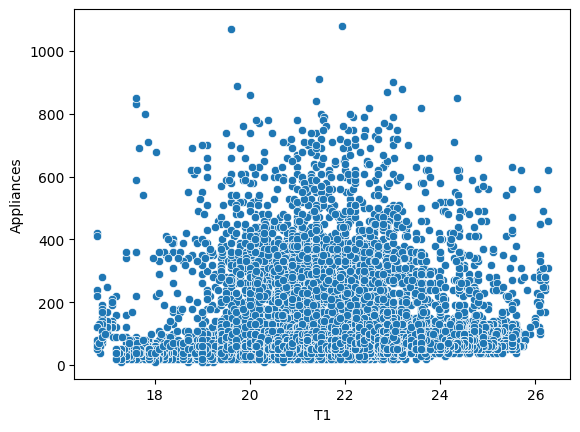

In [8]:
# Explore the relationship between features and target variable:
sns.scatterplot(x='T1', y='Appliances', data=df)
plt.show()

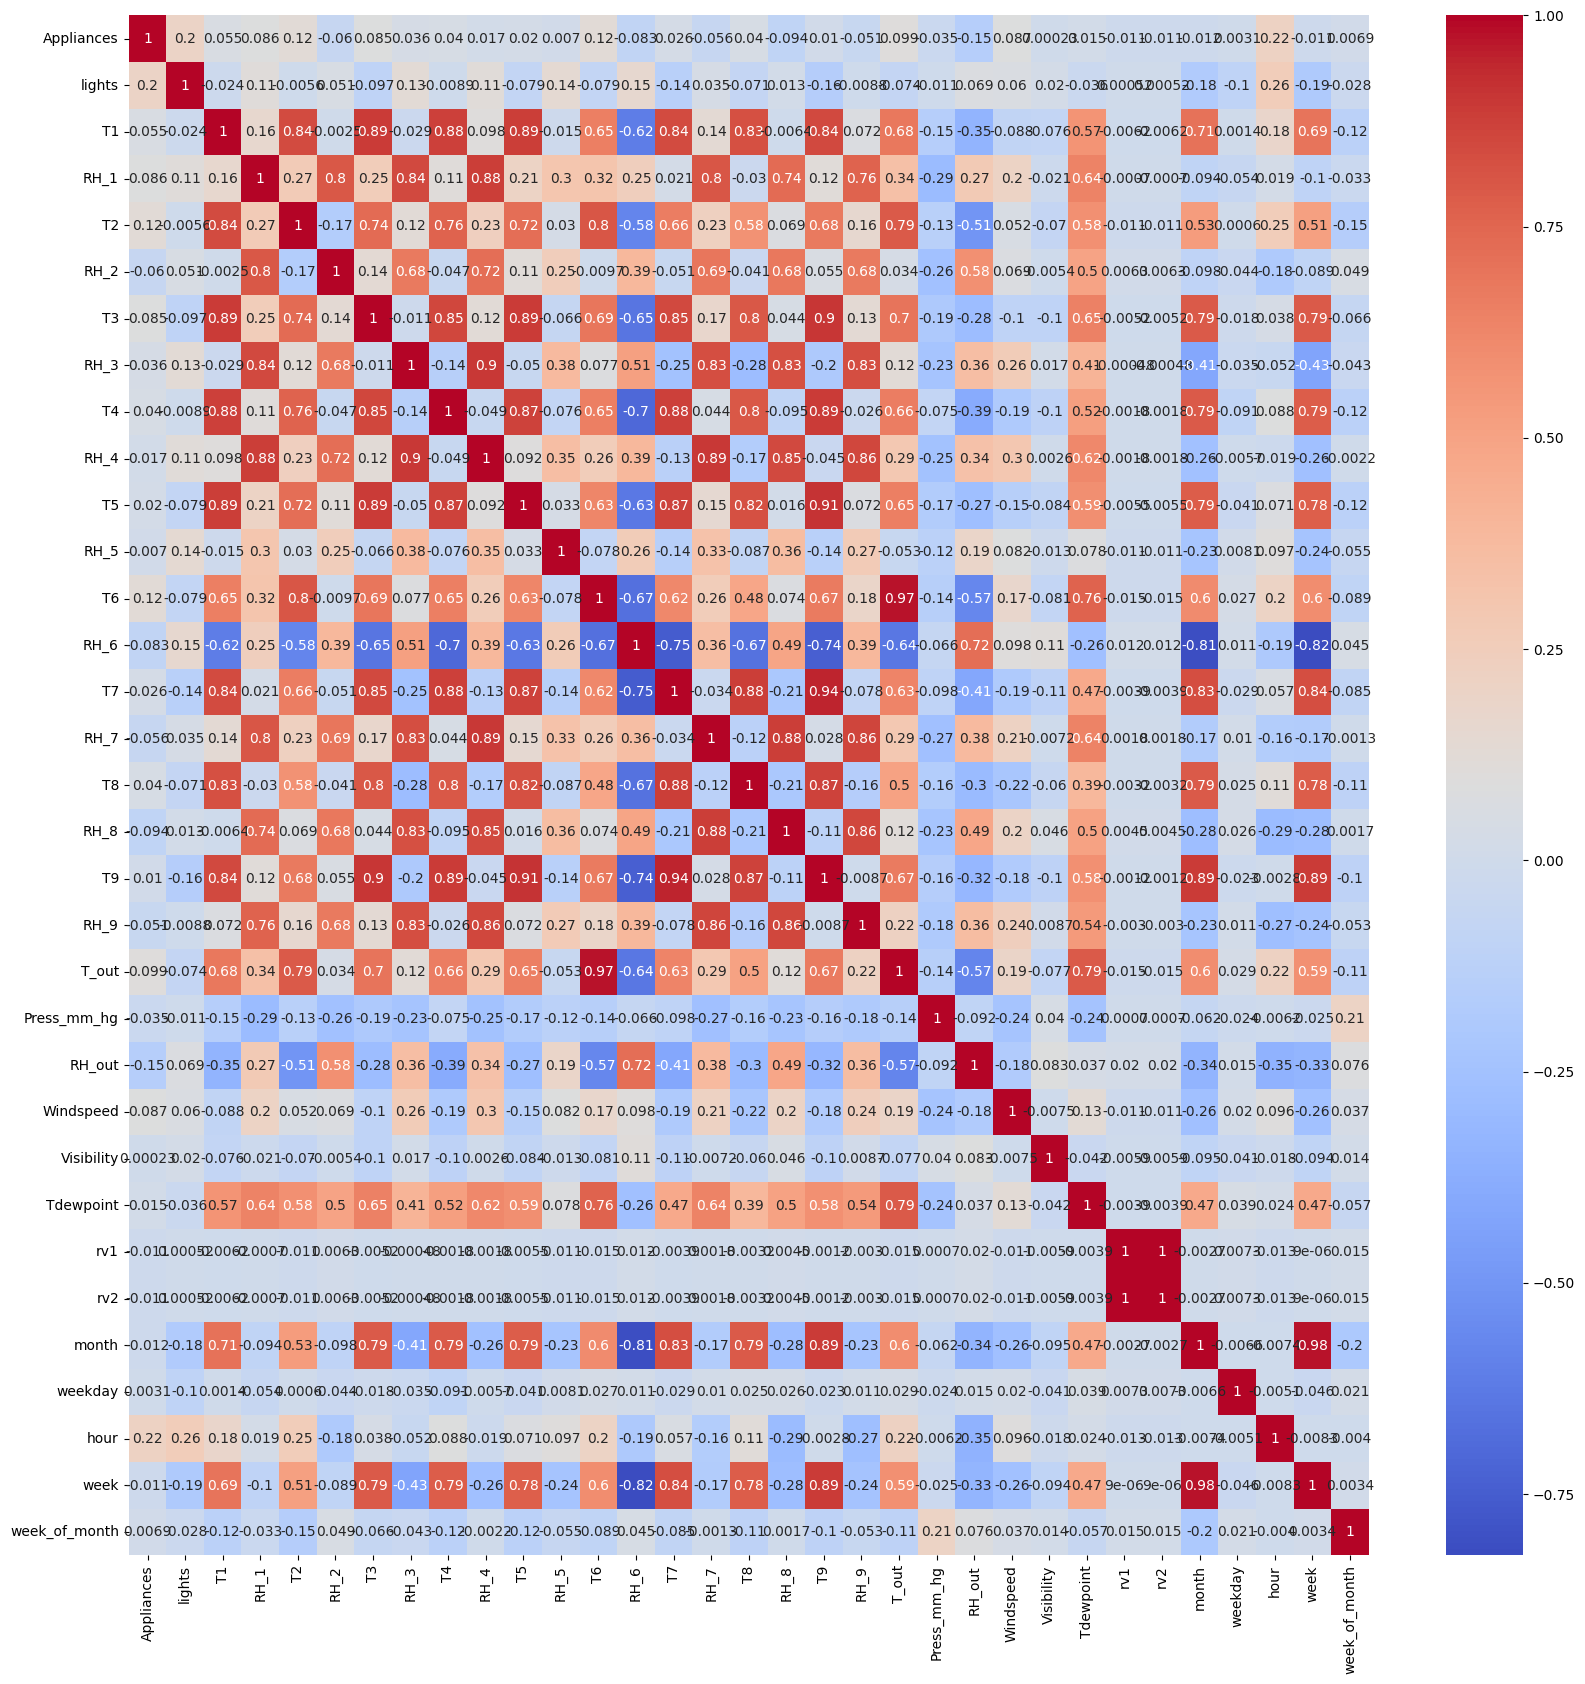

In [9]:
# Explore the relationship between features: 

# compute the correlation matrix
corr_matrix = df.corr()

# create the heatmap with a larger size
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# show the plot
plt.show()


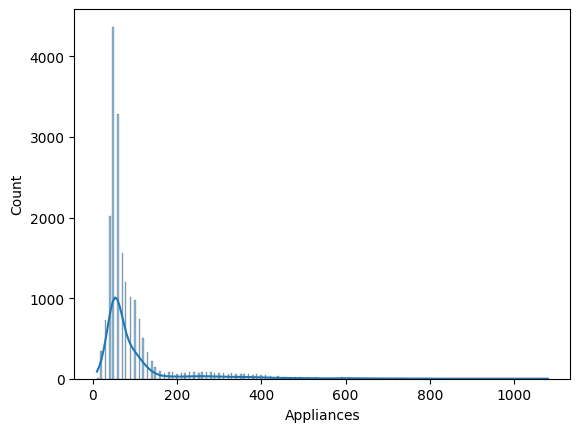

In [10]:
# Visualize the distribution of the target variable:
sns.histplot(df['Appliances'], kde=True)
plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Extract the features to be checked for multicollinearity
X = df[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
vif

Features          VIF
0    Appliances     2.284702
1        lights     1.614563
2            T1  3606.384646
3          RH_1  1688.811559
4            T2  2519.584504
5          RH_2  2205.364940
6            T3  1276.028377
7          RH_3  1572.250962
8            T4  1027.802978
9          RH_4  1394.032518
10           T5  1187.467773
11         RH_5    45.212497
12           T6    89.644991
13         RH_6    40.427397
14           T7  1614.414817
15         RH_7   519.766076
16           T8   988.658164
17         RH_8   587.710860
18           T9  2605.026073
19         RH_9   640.567425
20        T_out   400.746379
21  Press_mm_hg  2088.596143
22       RH_out  1299.243530
23    Windspeed     5.272703
24   Visibility    12.037321
25    Tdewpoint   132.553551

In [12]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  month  weekday  hour  week day_of_week  week_of_month  
0  13.275433      1        0    17     2      Monday              2  
1  18.606195      1        0    17     2      Monday              2  
2  28.642668      1        0    17     2      Monday              2  
3  45.410389      1        0    17     2      Monday              2  
4  10.084097      1        0    17     2      Monday              2

In [13]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'month', 'weekday', 'hour',
       'week', 'day_of_week', 'week_of_month'],
      dtype='object')

In [14]:
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps=eps, min_samples= min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [15]:
df_cluster_input = df[['Appliances']]
clusters = remove_outliers_DBSCAN(df_cluster_input,0.5,10)
clusters.value_counts().sort_values(ascending=False)

1     4368
0     3282
17    2019
2     1560
9     1205
      ... 
4       11
58      11
59      11
42      10
56      10
Name: cluster, Length: 63, dtype: int64

In [16]:
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Int64Index([  393,   431,   432,   443,   731,   732,   867,   868,  1031,
             1079,
            ...
            15799, 15812, 15841, 16647, 17861, 18820, 18830, 19541, 19581,
            19582],
           dtype='int64', length=120)

In [17]:
df['cluster']= df_cluster['cluster'].values
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  month  weekday  hour  week day_of_week  week_of_month  cluster  
0  13.275433      1        0    17     2      Monday              2        0  
1  18.606195      1        0    17     2      Monday              2        0  
2  28.642668      1        0    17     2      Monday              2        1  
3  45.410389      1        0    17     2      Monday              2        1  
4  10.084097      1        0    17     2      Monday              2        0

In [18]:
len(ind_outlier)
unique_clusters =df_cluster['cluster'].unique
unique_clusters

<bound method Series.unique of 0         0
1         0
2         1
3         1
4         0
         ..
19730     7
19731     8
19732    41
19733    38
19734     5
Name: cluster, Length: 19735, dtype: int64>

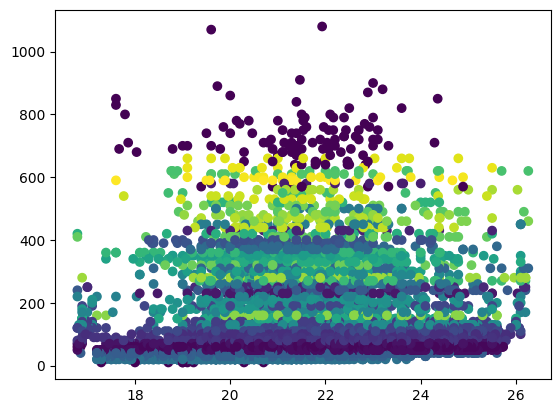

In [19]:
plt.scatter(df['T1'], df['Appliances'], c= df['cluster'])

In [20]:
# Use this step to rather get the derived feature "season" encoded into numerical variable 

#encoding the day_of_week column 
weekdays_encoded = pd.get_dummies(df.day_of_week)

#run the below line only once as concat keeps adding more columns everytime it's run
data = pd.get_dummies(df, columns=['day_of_week'])
data

date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:00:00          60      30  19.890000  47.596667   
1     2016-01-11 17:10:00          60      30  19.890000  46.693333   
2     2016-01-11 17:20:00          50      30  19.890000  46.300000   
3     2016-01-11 17:30:00          50      40  19.890000  46.066667   
4     2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                   ...         ...     ...        ...        ...   
19730 2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731 2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732 2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733 2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734 2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4       RH_4  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  45.566667   
1      19.200000  44.722500  19.790000  44.790000  19.000000  45.992500   
2      19.200000  44.626667  19.790000  44.933333  18.926667  45.890000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  45.723333   
4      19.200000  44.530000  19.790000  45.000000  18.890000  45.530000   
...          ...        ...        ...        ...        ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  45.590000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  45.590000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  45.730000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  45.790000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  45.963333   

              T5       RH_5         T6       RH_6         T7       RH_7  \
0      17.166667  55.200000   7.026667  84.256667  17.200000  41.626667   
1      17.166667  55.200000   6.833333  84.063333  17.200000  41.560000   
2      17.166667  55.090000   6.560000  83.156667  17.200000  41.433333   
3      17.166667  55.090000   6.433333  83.423333  17.133333  41.290000   
4      17.200000  55.090000   6.366667  84.893333  17.200000  41.230000   
...          ...        ...        ...        ...        ...        ...   
19730  23.200000  52.400000  24.796667   1.000000  24.500000  44.500000   
19731  23.230000  52.326667  24.196667   1.000000  24.557143  44.414286   
19732  23.230000  52.266667  23.626667   1.000000  24.540000  44.400000   
19733  23.200000  52.200000  22.433333   1.000000  24.500000  44.295714   
19734  23.200000  52.200000  21.026667   1.000000  24.500000  44.054000   

            T8       RH_8         T9     RH_9      T_out  Press_mm_hg  \
0      18.2000  48.900000  17.033333  45.5300   6.600000        733.5   
1      18.2000  48.863333  17.066667  45.5600   6.483333        733.6   
2      18.2000  48.730000  17.000000  45.5000   6.366667        733.7   
3      18.1000  48.590000  17.000000  45.4000   6.250000        733.8   
4      18.1000  48.590000  17.000000  45.4000   6.133333        733.9   
...        ...        ...        ...      ...        ...          ...   
19730  24.7000  50.074000  23.200000  46.7900  22.733333        755.2   
19731  24.7000  49.790000  23.200000  46.7900  22.600000        755.2   
19732  24.7000  49.660000  23.200000  46.7900  22.466667        755.2   
19733  24.6625  49.518750  23.200000  46.8175  22.333333        755.2   
19734  24.7360  49.736000  23.200000  46.8450  22.200000        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0      92.000000   7.000000   63.000000   5.300000  13.275433  13.275433   
1      92.000000   6.666667   59.166667   5.200000  18.606195  18.606195   
2      92.000000   6.333333   55.333333   5.100000  28.642668  28.642668   
3      92.000000   6.000000   51.500000   5.000000  45.410389  45.410389   
4      92.000000   5.666667   47.666667   4.900000  10.084097  10.084097   
...          ...        ...      

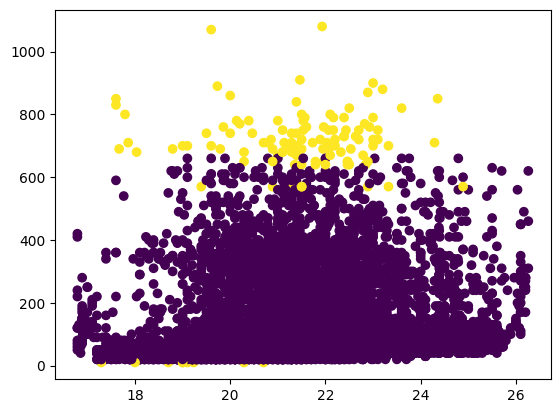

In [21]:
data['outlier_flag'] = data['cluster']==-1
data['outlier_flag'] = data['outlier_flag'].astype(int)
data.head()

#plotting the outliers 
plt.scatter(data['T1'], data['Appliances'], c= data['outlier_flag'])

In [22]:
data_outliers_removed = data[data['outlier_flag'] == 0]
data_outliers = data[data['outlier_flag'] == 1]
data_outliers_removed.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  month  weekday  hour  week  week_of_month  cluster  \
0  13.275433      1        0    17     2              2        0   
1  18.606195      1        0    17     2              2        0   
2  28.642668      1        0    17     2              2        1   
3  45.410389      1        0    17     2              2        1   
4  10.084097      1        0    17     2              2        0   

   day_of_week_Friday  day_of_week_Monday  day_of_week_Saturday  \
0                   0                   1                     0   
1                   0                   1                     0   
2                   0                   1                     0   
3                   0                   1                     0   
4                   0                   1                     0   

   day_of_week_Sunday  day_of_week_Thursday  day_of_week_Tuesday  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   day_of_week_Wednesday  outlier_flag  
0                      0             0  
1                      0             0  
2                      0             0  
3                      0             0  
4                      0             0

In [23]:
fig = px.scatter(data, x="T1", y="Appliances", color="outlier_flag", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show(renderer="colab")
     

fig = px.box(data, x="outlier_flag", y="Appliances")
fig.show(renderer="colab")

Text(0, 0.5, 'Price ($)')

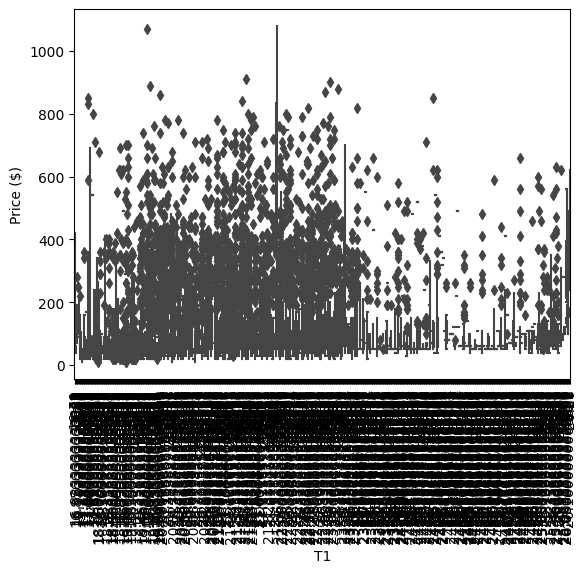

In [24]:
#Outlier detection using IQR
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final
     

df_outlier_removed=remove_outlier_IQR(df_cluster_input.Appliances)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=data.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df_cluster_input.drop([ind_diff[i]])
    df=df_final
    
sns.boxplot(y='Appliances', x='T1',data=data)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [25]:
df_outlier_removed

Appliances
0              60
1              60
2              50
3              50
4              60
...           ...
19727         120
19728         110
19729          90
19730         100
19731          90

[17597 rows x 1 columns]

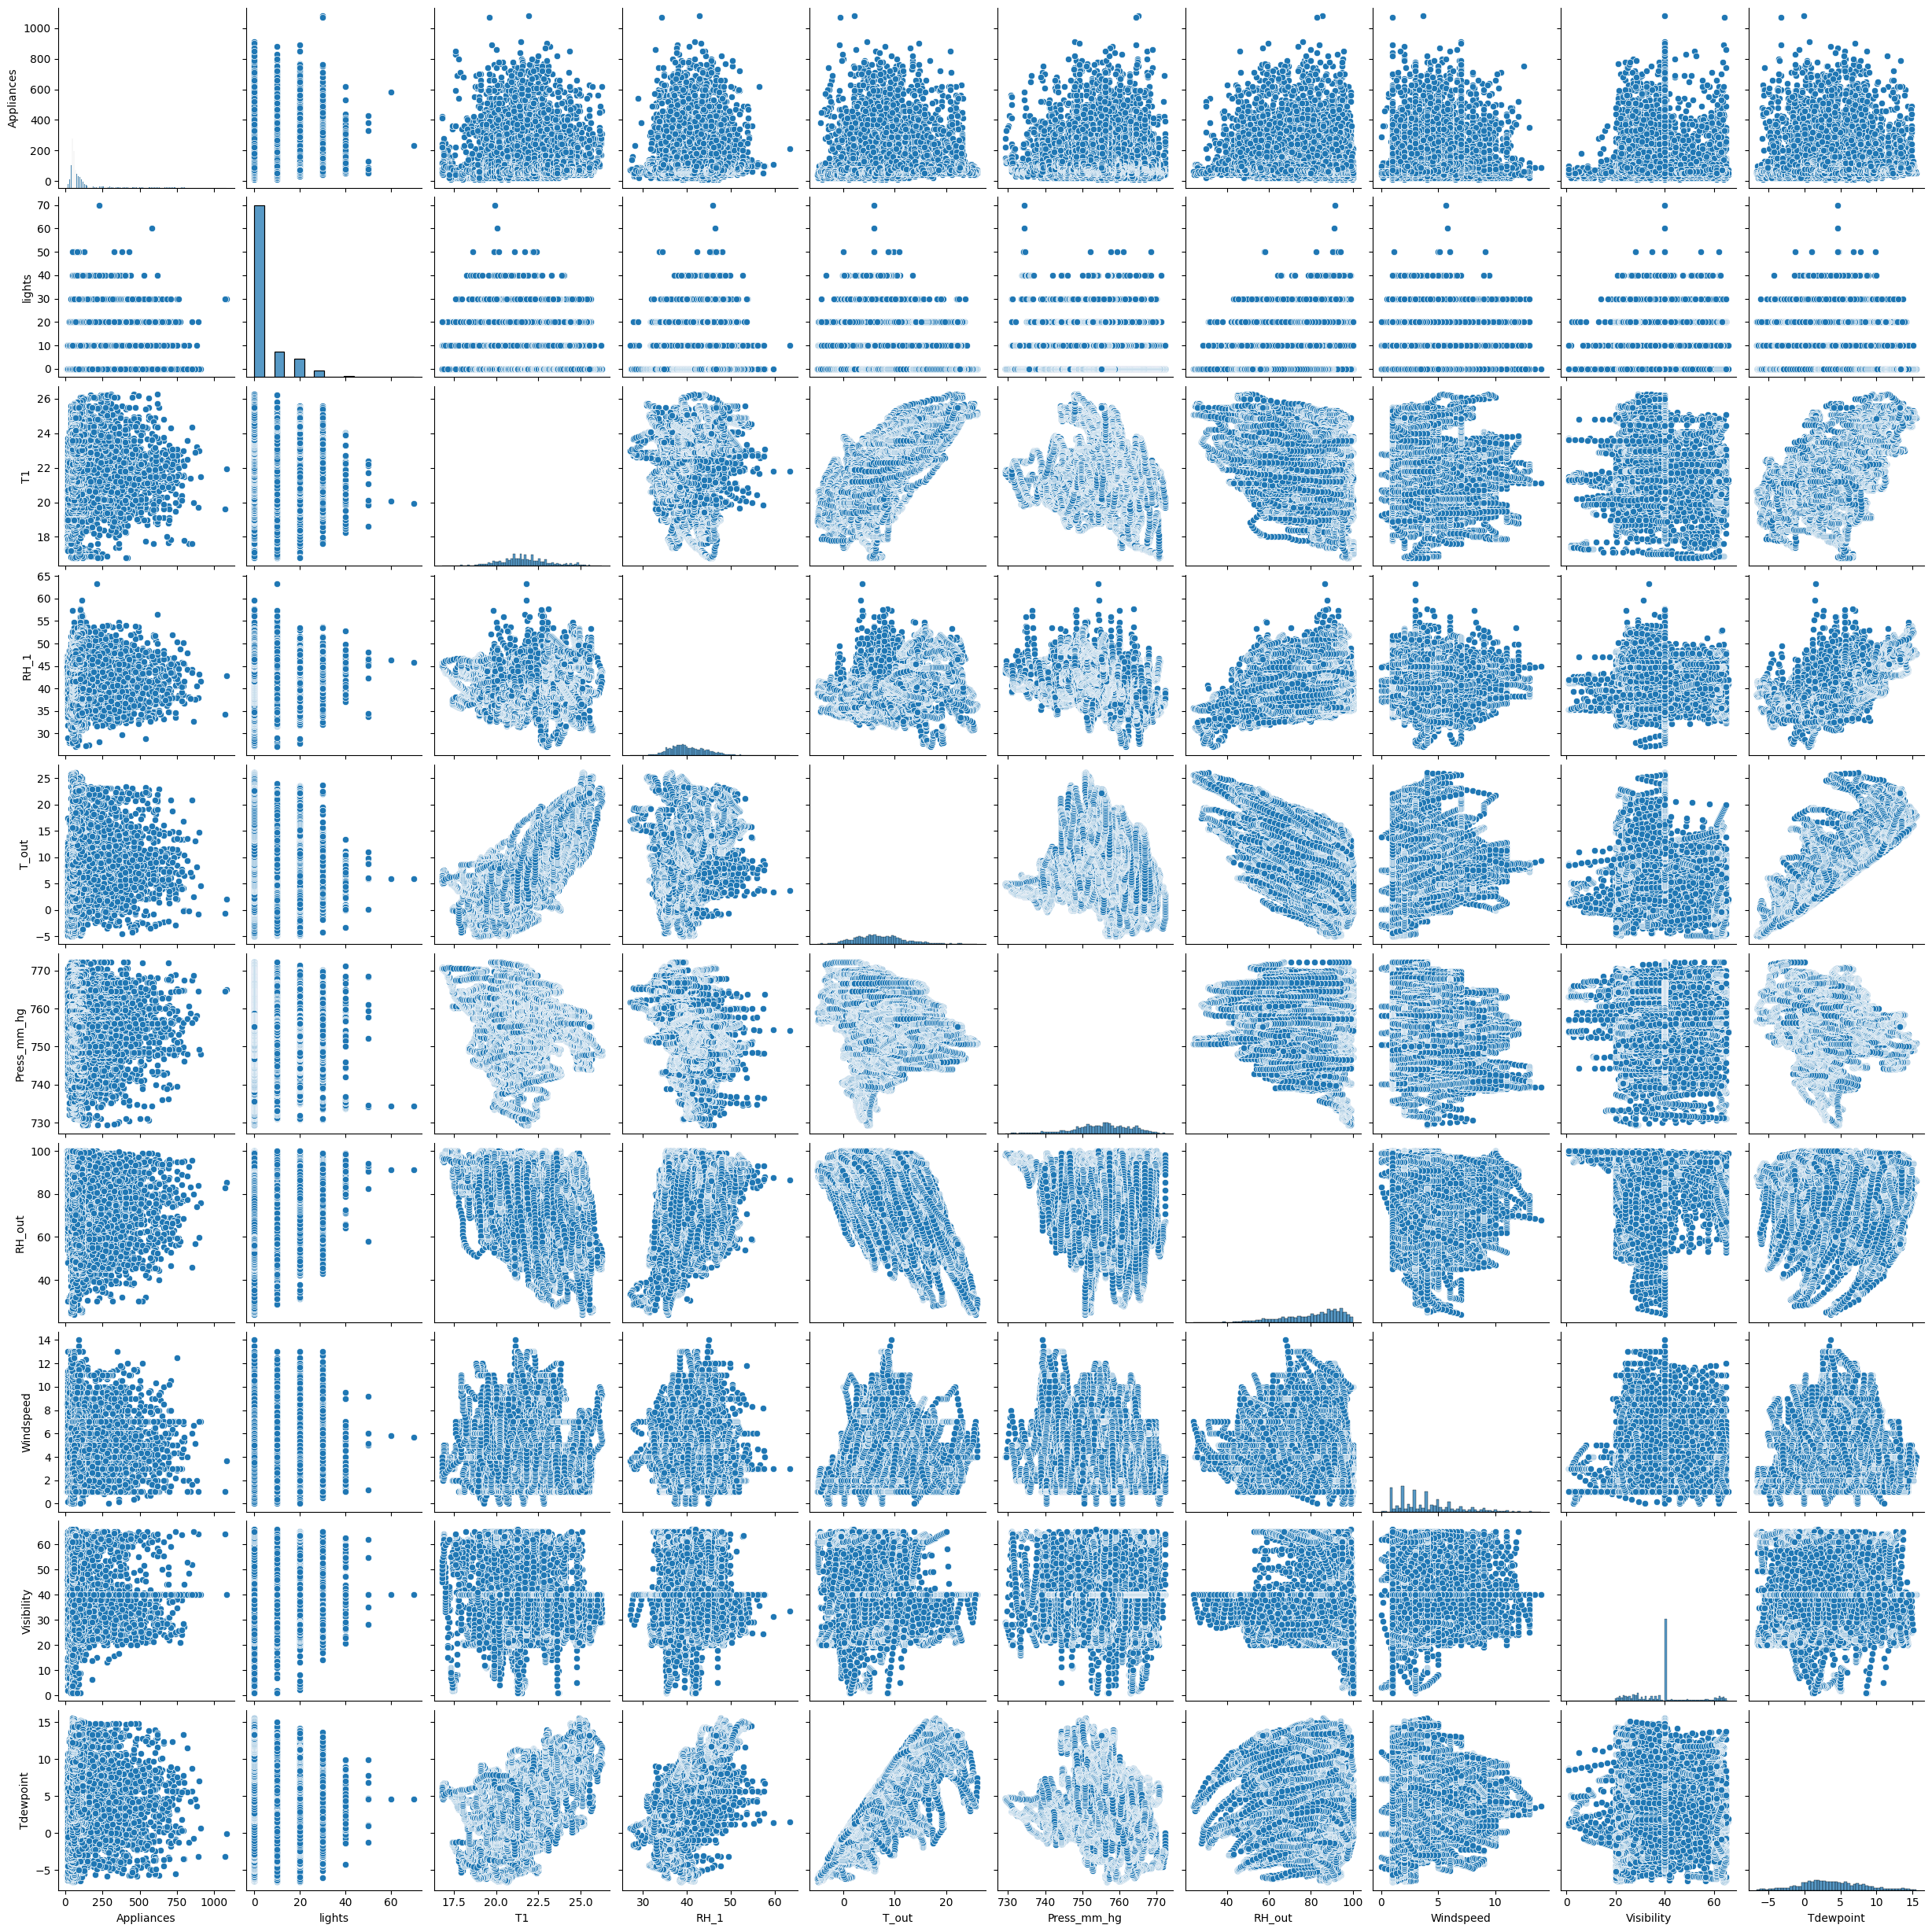

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'month', 'weekday', 'hour',
       'week', 'week_of_month', 'cluster', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'outlier_flag'],
      dtype='object')

In [26]:
data_1 = data[['Appliances','lights','T1','RH_1','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]
sns.pairplot(data_1, kind='scatter')
plt.show()
data.columns

In [27]:
X = data.drop(columns=['Appliances','date','cluster','outlier_flag'],axis=1)
y = data['Appliances']

# First, split the data into 60% training and 40% for testing and validation
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.4, random_state=23)

model = DecisionTreeRegressor()
# fit the model
model.fit(X_train_1, y_train_1)
# get importance
importance = model.feature_importances_
# summarize feature importance
impList = zip(X_train_1.columns, importance)
for feature in sorted(impList, key = lambda t: t[1], reverse=True):
    print(feature)

('hour', 0.14197582133586864)
('T3', 0.05897781248525565)
('RH_5', 0.053968460515644794)
('RH_2', 0.04739623826068809)
('T8', 0.04582551490722342)
('Press_mm_hg', 0.044889247095704334)
('RH_3', 0.043546884518500896)
('RH_1', 0.042997631259557176)
('RH_9', 0.03781244548297444)
('RH_8', 0.03723957734201736)
('RH_6', 0.03708141790102995)
('RH_7', 0.03321244417848929)
('lights', 0.02831151533483701)
('T1', 0.027916069181151554)
('T7', 0.02787612815097014)
('T4', 0.027017013028710495)
('Visibility', 0.02643517393682855)
('T2', 0.025147314711282516)
('RH_4', 0.023339696945792025)
('T6', 0.02259318389484648)
('rv2', 0.02235264710622108)
('RH_out', 0.019705775599053805)
('Windspeed', 0.019142289813973052)
('Tdewpoint', 0.01857852940088033)
('rv1', 0.015668282127066835)
('T5', 0.015642416899309522)
('T_out', 0.014437099597252236)
('month', 0.012234560114034208)
('T9', 0.00823040139474047)
('weekday', 0.007815147829778876)
('week', 0.004322304016550583)
('week_of_month', 0.004125314202523578)
('

In [28]:
# Preprocessing
X = data.drop(columns=['Appliances','date'],axis=1)
y = data['Appliances']

# First, split the data into 60% training and 40% for testing and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=23)

# Then, split the testing and validation data equally into 50% each
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=23)


In [29]:
#Feature selection using RFE with logistic regression
model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=20, step=1)

sel_rfe_logistic.fit(X_train, y_train)
selected_features = X_train.columns[sel_rfe_logistic.support_]
selected_features

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'T6',
       'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Tdewpoint', 'hour', 'week',
       'cluster'],
      dtype='object')

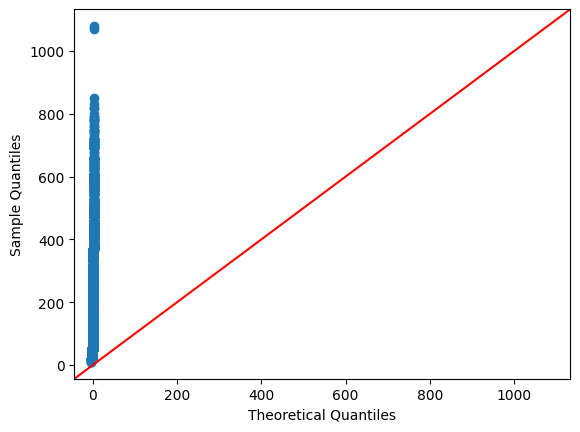

In [30]:
#Outlier detection using the input varibles
#Implementing LOF for the outlier detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)

y_pred = lof.fit_predict(X_train)

lofs_index = np.where(y_pred==-1)

arr = list(lofs_index[0])
values = X_train[X_train.index.isin(arr)]
X_train['outlier'] = X_train.index.isin(values.index).astype(int)


outlier_df = X_train.copy()
outlier_df['Appliances'] = y_train.tolist()
X_train = X_train.drop('outlier',axis=1)

     

fig = px.box(outlier_df, y="Appliances", color="outlier",
             notched=True, # used notched shape
             title="Energy usage for regular data points and the data points with outliers"# add day column to hover data
            )
fig.show(renderer="colab")
     

import statsmodels.api as sm
import pylab as py

sm.qqplot(outlier_df['Appliances'], line ='45')
py.show()

Text(0.5, 1.0, 'Histogram and KDE of sepal length')

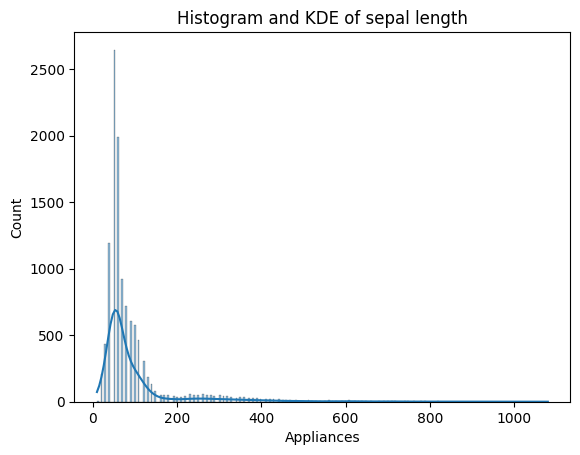

In [31]:
fig, ax = plt.subplots()
sns.histplot(data=outlier_df, x= 'Appliances', kde=True)
ax.set_title("Histogram and KDE of sepal length")
     

In [32]:
skewness = outlier_df['Appliances'].skew()
print(f'Skewness for Appliances = {skewness}')

Skewness for Appliances = 3.4181660638456384


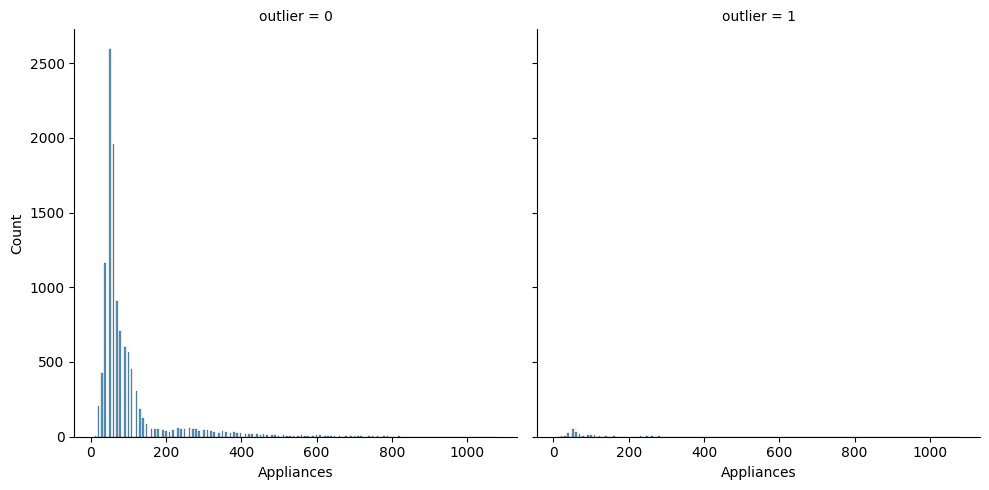

In [33]:
sns.displot(outlier_df, x="Appliances", col="outlier")

In [34]:
appliances_log = np.log(outlier_df['Appliances'])
print(f'Skewness for Appliances =',appliances_log.skew())

Skewness for Appliances = 1.1609365204344781


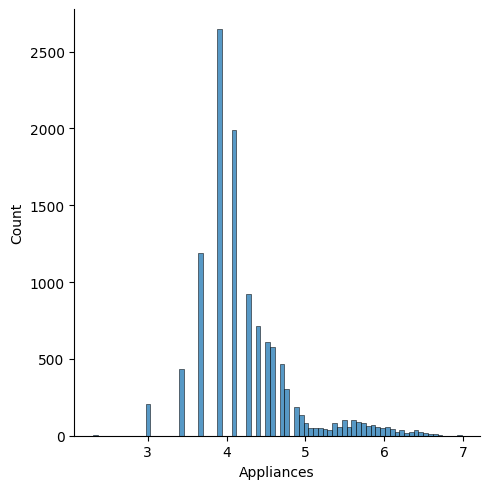

In [35]:
sns.displot(appliances_log)

In [36]:
# Scale the features  - do not run
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
y_train_log = np.log(y_train)

## Model Implementation


In [37]:
#Linear Regression
#NEW LR
@dataclass
class LinearRegression:
    """ Linear Regression
    epsilon: Tolerance
    maxIteration: Maximum number of Iteration before the loop breaks.
    gd: Picks the option for gradient descent
        0: Normal Equation
        1: Gradient Descent
        2: Stochastic Descent
    lambda_value:
        0: Means no Regularization
        >0: Means Regularization

    """
    X : np.array
    y : np.array
    learningRate : float
    epsilon : float
    errors : list = field(default_factory=list)
    maxIteration : int = 50000
    gd : int = 0
    lambda_value : int = 0
    sample_size : int = 100
    s : int = 0

    def addX0(self, X):

      return np.column_stack([np.ones(X.shape[0]), X])

    def rank(self, X):
      v, s, u = np.linalg.svd(X)
      rank = sum([True if i > 0 else False for i in s])
      # with Numpy, the rank is calculated like below
      rank = np.linalg.matrix_rank(X)
      return rank

    def checkFullrank(self, X):
      rank = self.rank(X)
      if rank == min(X.shape):
        print("its full rank")
        self.Fullrank = True
      else:
        self.Fullrank = False

    def checkLowRank(self, X):
      if X.shape[1] > X.shape[0]:
        self.LowRank = True
      else:
        self.LowRank = False


    def normalEquation(self, X, y):
      # adding regularization term
      normEq_term = self.lambda_value * np.identity(X.shape[1])
      self.w = np.linalg.inv(X.T.dot(X) + normEq_term).dot(X.T).dot(y)
      # Show error metrics
      self.error_report(X,y)

    def predict(self, X):
      return X.dot(self.w)

    def sse(self, X, y):
      y_hat = self.predict(X)
      
      return ((y_hat - y) ** 2).sum() # Norm 2
    
    def costFunction(self, X, y):
      sse = self.sse(X, y)
      return sse/2 # Division by 2 to remove the derived power of 2

    def rmse(self, X, y):
      return np.sqrt((self.sse(X, y))/ X.shape[0])

    def r2_squared(self, X, y):
      y_hat = self.predict(X)
      return np.exp(r2_score(y,y_hat))

    def error_report(self, X, y):
      print()
      print("SSE: {}".format(self.costFunction(X,y)))
      print("RMSE: {}".format(self.rmse(X, y)))
      print("R^2: {}".format(self.r2_squared(X, y)))

    def costDerivative(self, X, y):
      y_hat = self.predict(X)
      m = y.shape[0]
      return 1/m * X.T.dot(y_hat - y)

    def gradientDescent(self, X, y):
      self.errors = []
      prev_error = float(np.inf)
      linear_reg_term = self.lambda_value * self.w
      for i in tqdm(range(self.maxIteration)):
          grad = self.costDerivative(X, y)
          self.w -= self.learningRate * (grad + linear_reg_term)
          current_error = self.rmse(X, y)
          if np.isnan(current_error):
              print("The values are out of Domain")
              break
          self.errors.append(current_error)
          if np.allclose(current_error, prev_error, rtol=self.epsilon):
              print("The model stopped learning")
              self.s = i + 1
              break
          prev_error = current_error
      # Showing error metrics
      self.error_report(X, y)


    #Creating function for stochastic gradient
    def stochasticgradientDescent(self, X, y, sample_size):
      
      
      self.errors = []
      prev_error = float(np.inf) 
      for i in tqdm(range(self.maxIteration)):

        index = np.random.choice(np.arange(len(X)), self.sample_size, replace = False)
        X_sample = X[index]
        y_sample = y[index]
        grad_sample = self.costDerivative(X_sample, y_sample)
        # adding regularization term 
        linear_reg_term = self.lambda_value * self.w
        self.w = self.w - self.learningRate * (grad_sample + linear_reg_term)
        current_error = self.rmse(X, y)
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print()
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      
      # Showing error metrics
      self.error_report(X,y)

    def mse_var_bias(self, X, y):
      mse = self.costFunction(X, y)/ len(y)
      y_hat = self.predict(X)
      mse_bias = np.mean((y - np.mean(y_hat)) ** 2)
      mse_var = np.var(y_hat)
      print("MSE: {:.2f}".format(mse))
      print("Bias: {:.2f}".format(mse_bias))
      print("Variance: {:.2f}".format(mse_var))
      

    def fit(self):
      X_train = self.addX0(self.X)
      y_train = self.y

      self.checkFullrank(X_train)
      self.checkLowRank(X_train)

      if self.Fullrank and not self.LowRank and X_train.shape[0] < 10000 \
      and self.gd == 0:
        print("Solving using closed form")
        self.normalEquation(X_train, y_train)

      elif self.gd == 1:
        print("Solving using Gradient Descent")
        self.w = np.zeros(X_train.shape[1])
        print()
        print("For Training Data")
        self.gradientDescent(X_train, y_train)
        
        print("For Test Data")
        X_testdata = self.addX0(X_test)
        self.error_report(X_testdata, y_test)
        
        print("For Validation Data")
        X_valid = self.addX0(X_val)
        self.error_report(X_valid, y_val)

        print("\nBias Variance Tradeoff")
        self.mse_var_bias(X_testdata, y_test)
      
      else:
        print("Solving using Stochastic Gradient")
        self.w = np.zeros(X_train.shape[1])
        self.stochasticgradientDescent(X_train, y_train, self.sample_size)

      print()
      print("Weights:  {}".format(self.w))
     

In [38]:
lf = LinearRegression(X = X_train, # All columns except Appliances
                       y = np.array(y_train), # Appliances column
                       learningRate=0.0001,
                       maxIteration = 500, 
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.001
                       ).fit()
     

Solving using Gradient Descent

For Training Data


  0%|          | 1/500 [00:00<00:04, 99.93it/s]

The model stopped learning

SSE: 115976894.1310322
RMSE: 139.96084129749775
R^2: 0.3969427103264449
For Test Data

SSE: 40339795.18008362
RMSE: 142.97110673161427
R^2: 0.4125030248277873
For Validation Data

SSE: 41510059.85973756
RMSE: 145.03008932667262
R^2: 0.41310255403157586

Bias Variance Tradeoff
MSE: 10220.37
Bias: 20443.69
Variance: 0.00

Weights:  [ 1.94043165e-02  4.06219748e-03  1.17445159e-03  1.78116650e-03
  2.51453689e-03 -1.12073943e-03  1.77809383e-03  8.63730187e-04
  8.94071283e-04  5.48026602e-04  5.16475872e-04  3.15882159e-04
  2.47632419e-03 -1.69361488e-03  5.36540663e-04 -9.37701653e-04
  7.56027998e-04 -1.82133218e-03  2.41799155e-04 -9.25904829e-04
  2.13339462e-03 -5.99365345e-04 -3.05337564e-03  1.83841630e-03
  3.22322515e-06  4.73482192e-04 -2.67916657e-04 -2.67916657e-04
 -2.43860173e-04 -1.31837400e-04  4.42946292e-03 -2.17820876e-04
  1.96641614e-04  1.11026935e-02  5.56836071e-04  1.36386830e-03
  5.18837655e-04 -2.27438306e-04 -7.04954812e-04 -9.280

In [39]:
lf = LinearRegression(X = X_train, # All columns except Appliances
                       y = np.array(y_train), # Appliances column
                       learningRate=0.001,
                       maxIteration = 500, 
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.01
                       ).fit()

Solving using Gradient Descent

For Training Data


  0%|          | 1/500 [00:00<00:03, 129.15it/s]

The model stopped learning

SSE: 115620747.04180431
RMSE: 139.74577702408487
R^2: 0.39929486633004657
For Test Data

SSE: 40217611.18957591
RMSE: 142.75442209048234
R^2: 0.41486555686316523
For Validation Data

SSE: 41384857.98767486
RMSE: 144.81120562205862
R^2: 0.41545676020293965

Bias Variance Tradeoff
MSE: 10189.41
Bias: 20408.27
Variance: 0.06

Weights:  [ 1.93955841e-01  4.05939078e-02  1.16894407e-02  1.77950305e-02
  2.50782424e-02 -1.11881927e-02  1.77299166e-02  8.63870670e-03
  8.88987482e-03  5.47339200e-03  5.11846459e-03  3.15830903e-03
  2.46959470e-02 -1.68794808e-02  5.31866742e-03 -9.37337777e-03
  7.51840916e-03 -1.81929471e-02  2.37419771e-03 -9.24922026e-03
  2.12669351e-02 -5.98487404e-03 -3.04709834e-02  1.83621591e-02
  4.02985841e-05  4.69890470e-03 -2.67379717e-03 -2.67379717e-03
 -2.47538657e-03 -1.31394260e-03  4.42380097e-02 -2.21473217e-03
  1.97195999e-03  1.10971498e-01  5.56493543e-03  1.36233161e-02
  5.18684460e-03 -2.27255716e-03 -7.04354974e-03 -9.

In [40]:
lf = LinearRegression(X = X_train, # All columns except Appliances
                       y = np.array(y_train), # Appliances column
                       learningRate=0.01,
                       maxIteration = 500, 
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.1
                       ).fit()

Solving using Gradient Descent

For Training Data


 35%|███▍      | 174/500 [00:00<00:00, 1202.71it/s]

The model stopped learning

SSE: 28197994.663510565
RMSE: 69.01284310220576
R^2: 1.702704666689515
For Test Data

SSE: 10306235.167704552
RMSE: 72.26557433664732
R^2: 1.6791353307885135
For Validation Data

SSE: 10141691.563868769
RMSE: 71.68637731897323
R^2: 1.7154727637117304

Bias Variance Tradeoff
MSE: 2611.16
Bias: 11105.64
Variance: 4225.60

Weights:  [80.31363717 10.8225709  -0.12378027  6.29716699  2.55360116 -1.22341222
  6.39226113  2.89100381  0.46387846  0.16082019 -0.51018813 -0.39937353
  2.51713392 -1.62973433 -0.22182318 -3.80346899  1.71466282 -5.59939299
 -0.36735044 -1.95339829  0.2168157  -2.42906326 -2.40254991  1.68253789
  1.31064237 -0.92720199 -0.15017547 -0.15017547 -1.66479865  0.40378885
  6.35701062 -1.57855965  1.01547702 44.27179617  1.39169226  2.70111993
  1.9821047  -0.36667098 -1.93404284 -2.4523732  -1.18578837 38.00343176]


In [41]:
# import pandas as pd

dff = [
    {"Approach": "Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.9", "R^2": "0.39"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "139.7", "R^2": "0.38"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "69.01", "R^2": "1.70"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "134.3", "R^2": "0.46"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "99.01", "R^2": "1.03"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "72.63", "R^2": "1.61"},
]

# Set the float format to scientific notation
pd.options.display.float_format = '{:.4e}'.format

# Create a pandas DataFrame with the data
results_table = pd.DataFrame(dff)

# Center-align the values and the column names in the DataFrame
styled_table = results_table.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

# Display the styled DataFrame
styled_table


In [42]:
#Linear Regression with Stochastic Gradient Descent and Regularization

X_train

array([[-0.47995445,  0.32725972, -0.76573124, ...,  2.39970032,
        -0.41532195, -0.07711562],
       [-0.47995445,  1.77207107, -0.45246966, ..., -0.4167187 ,
        -0.41532195, -0.07711562],
       [ 0.7671688 , -0.49565457, -1.52941219, ..., -0.4167187 ,
        -0.41532195, -0.07711562],
       ...,
       [-0.47995445,  0.0697064 , -0.4355366 , ...,  2.39970032,
        -0.41532195, -0.07711562],
       [ 2.01429204, -0.11246547,  0.34931068, ...,  2.39970032,
        -0.41532195, -0.07711562],
       [-0.47995445, -0.67782643, -1.65471683, ..., -0.4167187 ,
        -0.41532195, -0.07711562]])

In [43]:
#Ridge Regression

@dataclass
class RidgeRegression:
    """
    epsilon: Tolerance
    maxIteration: Maximum number of Iteration before the loop breaks.
    gd: Picks the option for gradient descent
        1: Gradient Descent
        2: Stochastic Descent
    lambda_value:
        0: Means no Regularization
        >0: Means Regularization

    """
    X : np.array
    y : np.array
    learningRate : float
    epsilon : float
    errors : list = field(default_factory=list)
    maxIteration : int = 50000
    gd : int = 0
    lambda_value : int = 0
    sample_size : int = 100
    s : int = 0

    def splitData(self):
      X_train, X_test, y_train, y_test = train_test_split(self.X,
                                                          self.y,
                                                          test_size=0.3,
                                                          shuffle=True)
      return X_train, X_test, y_train, y_test

    def addX0(self, X):

      return np.column_stack([np.ones(X.shape[0]), X])

    
    def normalizeTrain(self, X):
      """Z score normalization on the training data set
      Args:
        X: Dataset
      Returns:
        X_norm: Normalized z score Training dataset
        mean: Mean of Training data
        std: Standard deviation of Training data
      """
      mean = np.mean(X, axis=0)
      std = np.std(X, axis=0)
      X_norm = (X - mean)/std
      X_norm = self.addX0(X_norm)
      return X_norm, mean, std

    def predict(self, X):
      return X.dot(self.w)

    def sse(self, X, y):
      y_hat = self.predict(X)
      
      return ((y_hat - y) ** 2).sum() # Norm 2
    
    def costFunction(self, X, y):
      sse = self.sse(X, y)
      return sse/2 # Division by 2 to remove the derived power of 2

    def rmse(self, X, y):
      return np.sqrt((self.sse(X, y))/ X.shape[0])

    def r2_squared(self, X, y):
      y_hat = self.predict(X)
      return (np.exp(r2_score(y,y_hat)))

    def error_report(self, X, y):
      print()
      print("SSE: {}".format(self.costFunction(X,y)))
      print("RMSE: {}".format(self.rmse(X, y)))
      print("R^2: {}".format(self.r2_squared(X, y)))


    def costDerivative(self, X, y):
      y_hat = self.predict(X)
      m = y.shape[0]
      return 1/m * X.T.dot(y_hat - y)


    def gradientDescent(self, X, y):
      self.errors = []
      prev_error = float(np.inf) 
      for i in tqdm(range(self.maxIteration)):
        grad =  self.costDerivative(X, y)
        # adding regularization 
        linear_reg_term = self.lambda_value * self.w
        self.w = self.w - self.learningRate * (grad + linear_reg_term)
        current_error = self.rmse(X, y)
        if math.isnan(current_error):
            print("Out of Domain: Values Tending to Infinite")
            break 
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      # Showing error metrics
      self.error_report(X,y)


    # Creating function for stochastic gradient
    def stochasticgradientDescent(self, X, y, sample_size):
      
      
      self.errors = []
      prev_error = float(np.inf) 
      for i in tqdm(range(self.maxIteration)):

        index = np.random.choice(np.arange(len(X)), self.sample_size, replace = False)
        X_sample = X[index]
        y_sample = y[index]
        grad_sample = self.costDerivative(X_sample, y_sample)
        # adding regularization term 
        linear_reg_term = self.lambda_value * self.w
        self.w = self.w - self.learningRate * (grad_sample + linear_reg_term)
        current_error = self.rmse(X, y)
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      
      # Showing error metrics
      self.error_report(X,y)

    def mse_var_bias(self, X, y):
      mse = self.costFunction(X, y)/ len(y)
      y_hat = self.predict(X)
      mse_bias = np.mean((y - np.mean(y_hat)) ** 2)
      mse_var = np.var(y_hat)
      print("MSE: {:.2f}".format(mse))
      print("Bias: {:.2f}".format(mse_bias))
      print("Variance: {:.2f}".format(mse_var))


    def fit(self):    
      X_train = self.addX0(self.X)
      y_train = self.y

      if self.gd == 1:
        print("Solving using Gradient Descent")
        self.w = np.zeros(X_train.shape[1])
        self.gradientDescent(X_train, y_train)

        print("For Test Data")
        X_testdata = self.addX0(X_test)
        self.error_report(X_testdata, y_test)
        
        print("For Validation Data")
        X_valid = self.addX0(X_val)
        self.error_report(X_valid, y_val)

        print("\nBias Variance Tradeoff")
        self.mse_var_bias(X_testdata, y_test)
        
      
      else:
        print("Solving using Stochastic Gradient")
        self.w = np.zeros(X_train.shape[1])
        self.stochasticgradientDescent(X_train, y_train, self.sample_size)

      print("Weights:  {}".format(self.w))
    


In [44]:
ridge = RidgeRegression(X = X_train, # All columns except Appliances
                       y = np.array(y_train), # Appliances column
                       learningRate=0.0001,
                       maxIteration = 30,
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.001
                      ).fit()

Solving using Gradient Descent


100%|██████████| 30/30 [00:00<00:00, 737.33it/s]


SSE: 115424054.6570403
RMSE: 139.62685965460003
R^2: 0.40059988078611525
For Test Data

SSE: 40150133.562596604
RMSE: 142.63461420991595
R^2: 0.4161760893338537
For Validation Data

SSE: 41315703.621345446
RMSE: 144.69016480363194
R^2: 0.41676283612651654

Bias Variance Tradeoff
MSE: 10172.32
Bias: 20388.68
Variance: 0.13
Weights:  [ 2.90657208e-01  6.08018559e-02  1.73623214e-02  2.66402212e-02
  3.74072625e-02 -1.67218269e-02  2.64358282e-02  1.29620370e-02
  1.31763884e-02  8.18832127e-03  7.53360004e-03  4.73554439e-03
  3.68332925e-02 -2.51421771e-02  7.83253952e-03 -1.40484917e-02
  1.11473269e-02 -2.72253780e-02  3.42519221e-03 -1.38428693e-02
  3.16906929e-02 -8.94986182e-03 -4.55094171e-02  2.74735504e-02
  8.56438666e-05  6.93638158e-03 -3.99380266e-03 -3.99380266e-03
 -3.82718986e-03 -1.95698756e-03  6.61785193e-02 -3.43540060e-03
  2.97514603e-03  1.66281610e-01  8.33655627e-03  2.03865216e-02
  7.77535136e-03 -3.40304683e-03 -1.05463813e-02 -1.38869159e-02
 -7.97269315e-0

In [45]:
ridge = RidgeRegression(X = X_train, # All columns except Appliances
                       y = np.array(y_train), # Appliances column
                       learningRate=0.001,
                       maxIteration = 60,
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.01
                       ).fit()

Solving using Gradient Descent


100%|██████████| 60/60 [00:00<00:00, 1373.13it/s]


SSE: 105021473.09338245
RMSE: 133.18639384084787
R^2: 0.47605508863978485
For Test Data

SSE: 36581915.982246734
RMSE: 136.14906356871992
R^2: 0.49171023038814304
For Validation Data

SSE: 37652661.051923685
RMSE: 138.12722028989532
R^2: 0.4921460730574879

Bias Variance Tradeoff
MSE: 9268.28
Bias: 19337.60
Variance: 40.55
Weights:  [ 5.65147064e+00  1.16319638e+00  2.63128344e-01  5.04480141e-01
  6.41041966e-01 -3.01281105e-01  4.51841316e-01  2.58576577e-01
  1.87247396e-01  1.51052022e-01  8.23678348e-02  9.16980914e-02
  6.29296925e-01 -4.14667391e-01  8.78342267e-02 -2.73870656e-01
  1.61464014e-01 -5.10115991e-01  5.35464348e-03 -2.59769104e-01
  5.27095062e-01 -1.65208834e-01 -8.05962696e-01  5.08679533e-01
  1.42339942e-02  8.45011789e-02 -7.07063126e-02 -7.07063126e-02
 -1.28119805e-01 -3.16749318e-02  1.22429740e+00 -1.19942020e-01
  6.73298571e-02  3.22253002e+00  1.60379893e-01  3.80735391e-01
  1.52226172e-01 -6.46290914e-02 -2.00184012e-01 -2.64549520e-01
 -1.50805181e-

In [46]:
ridge = RidgeRegression(X = X_train, # All columns except Appliances
                       y = np.array(y_train), # Appliances column
                       learningRate=0.01,
                       maxIteration = 60,
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.1
                       ).fit()

Solving using Gradient Descent


100%|██████████| 60/60 [00:00<00:00, 1400.61it/s]


SSE: 52968702.81078114
RMSE: 94.58678758280433
R^2: 1.1289543595813567
For Test Data

SSE: 18738944.780315198
RMSE: 97.44375257185618
R^2: 1.1321606856742008
For Validation Data

SSE: 19164773.610180676
RMSE: 98.54470218096701
R^2: 1.1389979489089441

Bias Variance Tradeoff
MSE: 4747.64
Bias: 13788.14
Variance: 1466.68
Weights:  [ 4.27829465e+01  7.42306367e+00  4.83480386e-01  3.44336718e+00
  2.53136825e+00 -1.25485114e+00  2.69944021e+00  1.81291788e+00
  2.72168177e-01  6.42204747e-01 -3.13370237e-01  3.04330899e-01
  2.42977398e+00 -1.47644724e+00 -2.36213197e-01 -2.04668933e+00
  5.95697572e-01 -3.25609344e+00 -6.15082780e-01 -1.54248162e+00
  1.51587698e+00 -1.15636975e+00 -3.31484771e+00  2.29378500e+00
  4.67924308e-01 -3.20359165e-01 -2.55006731e-01 -2.55006731e-01
 -1.40960681e+00  2.31962810e-02  6.30534244e+00 -1.34181454e+00
  6.49929665e-01  2.37491003e+01  1.07083606e+00  2.15002055e+00
  1.13438489e+00 -3.73107419e-01 -1.27318937e+00 -1.68086077e+00
 -9.41333351e-01  

In [47]:
# import pandas as pd

dff = [
    {"Approach": "Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.6", "R^2": "0.40"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "133.04", "R^2": "0.47"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "94.06", "R^2": "1.13"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.65", "R^2": "0.40"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "133.04", "R^2": "0.47"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "94.06", "R^2": "1.13"},
]

# Set the float format to scientific notation
pd.options.display.float_format = '{:.4e}'.format

# Create a pandas DataFrame with the data
results_table = pd.DataFrame(dff)

# Center-align the values and the column names in the DataFrame
styled_table = results_table.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

# Display the styled DataFrame
styled_table


In [48]:
@dataclass
class LassoRegression:
    """
    epsilon: Tolerance
    maxIteration: Maximum number of Iteration before the loop breaks.
    gd: Picks the option for gradient descent
        1: Gradient Descent
        2: Stochastic Descent
    alpha:
        0: Means no Regularization
        >0: Means Regularization

    """
    X : np.array
    y : np.array
    learningRate : float
    epsilon : float
    errors : list = field(default_factory=list)
    maxIteration : int = 50000
    gd : int = 0
    lambda_value : int = 0
    alpha : int = 0
    sample_size : int = 100
    s : int = 0

    def splitData(self):
      X_train, X_test, y_train, y_test = train_test_split(self.X,
                                                          self.y,
                                                          test_size=0.3,
                                                          shuffle=True)
      return X_train, X_test, y_train, y_test

    def addX0(self, X):

      return np.column_stack([np.ones(X.shape[0]), X])

    
    def normalizeTrain(self, X):
      """Z score normalization on the training data set
      Args:
        X: Dataset
      Returns:
        X_norm: Normalized z score Training dataset
        mean: Mean of Training data
        std: Standard deviation of Training data
      """
      mean = np.mean(X, axis=0)
      std = np.std(X, axis=0)
      X_norm = (X - mean)/std
      X_norm = self.addX0(X_norm)
      return X_norm, mean, std

    def predict(self, X):
      return X.dot(self.w)

    def sse(self, X, y):
      y_hat = self.predict(X)
      
      return ((y_hat - y) ** 2).sum() # Norm 2
    
    def costFunction(self, X, y):
      sse = self.sse(X, y)
      return sse/2 # Division by 2 to remove the derived power of 2

    def rmse(self, X, y):
      return np.sqrt((self.sse(X, y))/ X.shape[0])

    def r2_squared(self, X, y):
      y_hat = self.predict(X)
      return (np.exp(r2_score(y,y_hat)))

    def error_report(self, X, y):
      print()
      print("SSE: {}".format(self.costFunction(X,y)))
      print("RMSE: {}".format(self.rmse(X, y)))
      print("R^2: {}".format(self.r2_squared(X, y)))


    def costDerivative(self, X, y):
      y_hat = self.predict(X)
      m = y.shape[0]
      return 1/m * X.T.dot(y_hat - y)

    def gradientDescent(self, X, y):
      self.errors = []
      prev_error = float(np.inf)
      for i in tqdm(range(self.maxIteration)):
        grad =  self.costDerivative(X, y)
        # adding regularization
        lasso_reg_term = self.lambda_value * np.sign(self.w)
        self.w = self.w - self.learningRate * (grad + lasso_reg_term)
        current_error = self.rmse(X, y)
        if math.isnan(current_error):
            print("Out of Domain: Values Tending to Infinite")
            break
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      # Showing error metrics
      self.error_report(X,y)


    # Creating function for stochastic gradient
    def stochasticgradientDescent(self, X, y, sample_size):
        
      self.errors = []
      prev_error = float(np.inf)
      for i in tqdm(range(self.maxIteration)):

        index = np.random.choice(np.arange(len(X)), self.sample_size, replace=False)
        X_sample = X[index]
        y_sample = y[index]
        grad_sample = self.costDerivative(X_sample, y_sample)
        # adding regularization term
        lasso_reg_term = self.lambda_value * np.sign(self.w)
        self.w = self.w - self.learningRate * (grad_sample + lasso_reg_term)
        current_error = self.rmse(X, y)
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      
      # Showing error metrics
      self.error_report(X,y)
    

    def mse_var_bias(self, X, y):
      mse = self.costFunction(X, y)/ len(y)
      y_hat = self.predict(X)
      mse_bias = np.mean((y - np.mean(y_hat)) ** 2)
      mse_var = np.var(y_hat)
      print("MSE: {:.2f}".format(mse))
      print("Bias: {:.2f}".format(mse_bias))
      print("Variance: {:.2f}".format(mse_var))
    
    
    def fit(self):
        X_train = self.addX0(self.X)
        y_train = self.y

        if self.gd == 1:
            print("Solving using Gradient Descent")
            self.w = np.zeros(X_train.shape[1])
            self.gradientDescent(X_train, y_train)

            print("For Test Data")
            X_testdata = self.addX0(X_test)
            self.error_report(X_testdata, y_test)
            
            print("For Validation Data")
            X_valid = self.addX0(X_val)
            self.error_report(X_valid, y_val)

            print("\nBias Variance Tradeoff")
            self.mse_var_bias(X_testdata, y_test)
      
        else:
            print("Solving using Stochastic Gradient")
            self.w = np.zeros(X_train.shape[1])
            self.stochasticgradientDescent(X_train, y_train, self.sample_size)

        print("Weights:  {}".format(self.w))

In [49]:
lasso = LassoRegression(X = X_train, # All columns except Appliances
                       y =  np.array(y_train), # Appliances column
                       learningRate=0.0001,
                       maxIteration = 100,
                       epsilon=0.00001,
                       gd=1,
                       lambda_value=0.001
                       ).fit()

Solving using Gradient Descent


100%|██████████| 100/100 [00:00<00:00, 1345.19it/s]


SSE: 114060746.20956823
RMSE: 138.79982275317397
R^2: 0.40976315225775684
For Test Data

SSE: 39682442.44420686
RMSE: 141.801437059607
R^2: 0.4253739607728219
For Validation Data

SSE: 40836278.14933288
RMSE: 143.84822630629964
R^2: 0.4259310566499855

Bias Variance Tradeoff
MSE: 10053.82
Bias: 20252.61
Variance: 1.36
Weights:  [ 9.65467327e-01  2.01570610e-01  5.58158039e-02  8.81581939e-02
  1.22161339e-01 -5.49961435e-02  8.62173725e-02  4.32354696e-02
  4.20270923e-02  2.70178239e-02  2.33919483e-02  1.57450896e-02
  1.20241730e-01 -8.16813804e-02  2.43726994e-02 -4.66757872e-02
  3.56028152e-02 -8.99677120e-02  9.79688670e-03 -4.57573511e-02
  1.03111186e-01 -2.94947660e-02 -1.49311672e-01  9.07143983e-02
  5.76837399e-04  2.17782866e-02 -1.30982648e-02 -1.30982648e-02
 -1.40930337e-02 -6.34505917e-03  2.18416131e-01 -1.27775980e-02
  1.01105137e-02  5.52112920e-01  2.76459383e-02  6.73564072e-02
  2.58465466e-02 -1.12626060e-02 -3.49139616e-02 -4.60009421e-02
 -2.63765202e-02  4

In [50]:
lasso = LassoRegression(X = X_train, # All columns except Appliances
                       y =  np.array(y_train), # Appliances column
                       learningRate=0.001,
                       maxIteration = 100,
                       epsilon=0.00001,
                       gd=1,
                       lambda_value=0.01
                       ).fit()

Solving using Gradient Descent


100%|██████████| 100/100 [00:00<00:00, 1330.26it/s]


SSE: 98558043.32564068
RMSE: 129.02291323687498
R^2: 0.5299362291360861
For Test Data

SSE: 34365257.615013495
RMSE: 131.95967479301714
R^2: 0.5453881948277742
For Validation Data

SSE: 35371405.575398415
RMSE: 133.87749993483155
R^2: 0.5458352753341019

Bias Variance Tradeoff
MSE: 8706.68
Bias: 18671.85
Variance: 99.63
Weights:  [ 9.23673539  1.87671367  0.36553559  0.811151    0.96845712 -0.46660606
  0.68820476  0.42505822  0.24798395  0.23638973  0.08166123  0.14571172
  0.9486345  -0.61202548  0.09059498 -0.4469664   0.21949377 -0.81461711
 -0.03945612 -0.41397163  0.77911667 -0.26209179 -1.23966392  0.80044717
  0.03387374  0.09443753 -0.10754408 -0.10754408 -0.24939327 -0.04431419
  1.93408189 -0.23555438  0.11695396  5.25347778  0.25913054  0.60492918
  0.24849823 -0.10281581 -0.32100816 -0.42522994 -0.2412381   4.24311138]


In [51]:
lasso = LassoRegression(X = X_train, # All columns except Appliances
                       y =  np.array(y_train), # Appliances column
                       learningRate=0.01,
                       maxIteration = 100,
                       epsilon=0.00001,
                       gd=1,
                       lambda_value=0.1
                       ).fit()

Solving using Gradient Descent


100%|██████████| 100/100 [00:00<00:00, 1468.22it/s]


SSE: 37513750.00401126
RMSE: 79.60054609913603
R^2: 1.4588917688367082
For Test Data

SSE: 13462853.971645761
RMSE: 82.59428581000651
R^2: 1.4488009580495291
For Validation Data

SSE: 13589566.954170221
RMSE: 82.98206604815024
R^2: 1.466966218832527

Bias Variance Tradeoff
MSE: 3410.91
Bias: 12091.05
Variance: 2684.00
Weights:  [ 6.14485939e+01  9.52366475e+00  2.51917438e-01  4.75671030e+00
  2.70913843e+00 -1.21082585e+00  4.13086808e+00  2.32152860e+00
  2.33852140e-01  4.76217191e-01 -3.61825894e-01  1.01311822e-02
  2.57391127e+00 -1.57489937e+00 -2.13235604e-01 -2.82593911e+00
  9.64773381e-01 -4.34789195e+00 -5.39994919e-01 -1.82392909e+00
  1.10512804e+00 -1.66404248e+00 -3.28291869e+00  2.22884425e+00
  7.66061903e-01 -5.64540375e-01 -1.84740563e-01 -1.84740563e-01
 -1.60626050e+00  1.57356156e-01  7.07484983e+00 -1.51270634e+00
  8.22202237e-01  3.38306432e+01  1.30648217e+00  2.55956583e+00
  1.53155281e+00 -3.63213039e-01 -1.60059773e+00 -2.10682319e+00
 -1.11048611e+00  2

## **Lasso Regression Metrics Comparison**

In [52]:
# import pandas as pd

dff = [
    {"Approach": "Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "138.7", "R^2": "0.40"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "129.02", "R^2": "0.52"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "79.6", "R^2": "1.45"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "138.7", "R^2": "0.41"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "129.4", "R^2": "0.52"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "79.82", "R^2": "1.45"},
]

# Set the float format to scientific notation
pd.options.display.float_format = '{:.4e}'.format

# Create a pandas DataFrame with the data
results_table = pd.DataFrame(dff)

# Center-align the values and the column names in the DataFrame
styled_table = results_table.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

# Display the styled DataFrame
styled_table


In [53]:
dff = [
    {"Approach": "Linear Regression (Gradient Descent)", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.9", "R^2": "0.39"},
    {"Approach": "Linear Regression (Stochastic Gradient Descent)", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "134.3", "R^2": "0.46"},
    {"Approach": "Ridge Regression (Gradient Descent)", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "133.04", "R^2": "0.47"},
    {"Approach": "Ridge Regression (Stochastic Gradient Descent)", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "133.04", "R^2": "0.47"},
    {"Approach": "Lasso Regression (Gradient Descent)", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "129.02", "R^2": "0.52"},
    {"Approach": "Lasso Regression (Stochastic Gradient Descent)", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "129.4", "R^2": "0.52"},
    {"Approach": "Neural Nets", "Learning Rate": "-", "Lambda Value": "-", "RMSE": "2.99", "R^2": "0.96"}
]

# Set the float format to scientific notation
pd.options.display.float_format = '{:.4e}'.format

# Create a pandas DataFrame with the data
results_table = pd.DataFrame(dff)

# Center-align the values and the column names in the DataFrame
styled_table = results_table.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

# Display the styled DataFrame
styled_table


## Neural Networks

In [54]:
neural_data = pd.read_csv('energydata_complete.csv')

# Preprocess data
neural_data.drop(columns=['date'], inplace=True)  # drop non-numeric date column
X_neural = neural_data.iloc[:, :-1].values  # features
y_neural = neural_data.iloc[:, -1].values.reshape(-1, 1)  # target

# Convert string data to float
X_neural = np.concatenate([X_neural[:, :2], X_neural[:, 3:]], axis=1)
X_neural = np.concatenate([X_neural[:, :8], X_neural[:, 9:]], axis=1)
X_neural = X_neural.astype(np.float32)

# Define the model
model = Sequential()
model.add(Dense(64, input_shape=(25,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_neural, y_neural, epochs=100, batch_size=32, validation_split=0.4)

# Make predictions
y_pred_neural = model.predict(X_neural)

Epoch 1/100
371/371 [==============================] - 4s 4ms/step - loss: 1180.1099 - val_loss: 209.4228
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 224.5811 - val_loss: 110.3299
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 132.2211 - val_loss: 31.1337
Epoch 4/100
371/371 [==============================] - 1s 3ms/step - loss: 74.9407 - val_loss: 34.5908
Epoch 5/100
371/371 [==============================] - 1s 4ms/step - loss: 61.8977 - val_loss: 19.5631
Epoch 6/100
371/371 [==============================] - 1s 4ms/step - loss: 52.9089 - val_loss: 14.8383
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 48.9318 - val_loss: 25.0503
Epoch 8/100
371/371 [==============================] - 1s 4ms/step - loss: 47.5123 - val_loss: 10.6182
Epoch 9/100
371/371 [==============================] - 2s 5ms/step - loss: 42.6732 - val_loss: 21.4030
Epoch 10/100
371/371 [==============================] - 1s 3ms/step

In [55]:
# Calculate R-square, RMSE, SSE
r2 = r2_score(y_neural, y_pred_neural)
rmse = mean_squared_error(y_neural, y_pred_neural, squared=False)
sse = mean_squared_error(y_neural, y_pred_neural, squared=True) * len(y_neural)
print('R2: {:.2f}'.format(r2))
print("RMSE: {:.2f}".format(rmse))
print("SSE: {:.2f}".format(sse))

R2: 0.99
RMSE: 1.24
SSE: 30331.94


### Linear Regression Results


## PCA

In [56]:
X_for_pca = data.drop(columns=['Appliances','date'],axis=1)
y_for_pca = data['Appliances']

In [57]:
# Create a PCA object
pca = PCA()

# Fit the PCA model on the data
pca.fit(X_for_pca)

# Calculate the cumulative sum of explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Print the number of components
print("Number of components to keep:", n_components)

# Create a new PCA object with the desired number of components
pca_transformer = PCA(n_components=n_components)

Number of components to keep: 9


In [58]:
# Scale the features
scaler1 = StandardScaler()
pca_scaled = scaler1.fit_transform(X_for_pca)

In [59]:
# Fit the PCA model on the data and transform it
X_transformed = pca_transformer.fit_transform(pca_scaled)

# Print the shape of the transformed data
print(X_transformed.shape)

(19735, 9)


In [60]:
# First, split the data into 60% training and 40% for testing and validation
X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X_transformed, y_for_pca, test_size=0.4, random_state=23)

# Then, split the testing and validation data equally into 50% each
X_test_pca, X_val_pca, y_test_pca, y_val_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=23)

## After PCA _ X_Train

In [61]:
pd.DataFrame(X_train_pca).head()

0           1           2           3           4           5  \
0  1.4080e+00 -2.1474e+00 -2.8726e-02  1.2085e+00 -2.3883e+00 -1.1773e+00   
1  6.3299e+00 -2.8534e-01 -1.6141e+00  1.3482e+00  1.0283e+00 -1.4066e+00   
2 -3.9956e+00  3.0902e-01  1.8718e+00  5.6185e-02 -1.5439e+00 -1.0520e+00   
3  8.2115e+00  3.9258e+00  2.2543e+00  7.7561e-01  1.9364e+00 -7.3187e-01   
4  1.2546e+00 -3.3457e+00  1.1399e+00 -1.6775e+00  6.1878e-01  1.8374e+00   

            6          7           8  
0  6.4288e-01 3.4933e-02  2.0295e+00  
1 -6.6358e-01 5.3147e-01 -1.7680e+00  
2  4.6752e-01 4.7573e-01 -5.5356e-01  
3  1.2568e+00 1.8150e-01  1.0238e-01  
4 -6.5977e-03 8.6771e-01  2.4426e-04

## Linear Regression with PCA

In [62]:
#Linear Regression with PCA
@dataclass
class LinearRegressionPCA:
    """ Linear Regression
    epsilon: Tolerance
    maxIteration: Maximum number of Iteration before the loop breaks.
    gd: Picks the option for gradient descent
        0: Normal Equation
        1: Gradient Descent
        2: Stochastic Descent
    lambda_value:
        0: Means no Regularization
        >0: Means Regularization

    """
    X : np.array
    y : np.array
    learningRate : float
    epsilon : float
    errors : list = field(default_factory=list)
    maxIteration : int = 50000
    gd : int = 0
    lambda_value : int = 0
    sample_size : int = 100
    s : int = 0

    def addX0(self, X):

      return np.column_stack([np.ones(X.shape[0]), X])

    def rank(self, X):
      v, s, u = np.linalg.svd(X)
      rank = sum([True if i > 0 else False for i in s])
      # with Numpy, the rank is calculated like below
      rank = np.linalg.matrix_rank(X)
      return rank

    def checkFullrank(self, X):
      rank = self.rank(X)
      if rank == min(X.shape):
        print("its full rank")
        self.Fullrank = True
      else:
        self.Fullrank = False

    def checkLowRank(self, X):
      if X.shape[1] > X.shape[0]:
        self.LowRank = True
      else:
        self.LowRank = False


    def normalEquation(self, X, y):
      # adding regularization term
      normEq_term = self.lambda_value * np.identity(X.shape[1])
      self.w = np.linalg.inv(X.T.dot(X) + normEq_term).dot(X.T).dot(y)
      # Show error metrics
      self.error_report(X,y)

    def predict(self, X):
      return X.dot(self.w)

    def sse(self, X, y):
      y_hat = self.predict(X)
      
      return ((y_hat - y) ** 2).sum() # Norm 2
    
    def costFunction(self, X, y):
      sse = self.sse(X, y)
      return sse/2 # Division by 2 to remove the derived power of 2

    def rmse(self, X, y):
      return np.sqrt((self.sse(X, y))/ X.shape[0])

    def r2_squared(self, X, y):
      y_hat = self.predict(X)
      return np.exp(r2_score(y,y_hat))

    def error_report(self, X, y):
      print()
      print("SSE: {}".format(self.costFunction(X,y)))
      print("RMSE: {}".format(self.rmse(X, y)))
      print("R^2: {}".format(self.r2_squared(X, y)))

    def costDerivative(self, X, y):
      y_hat = self.predict(X)
      m = y.shape[0]
      return 1/m * X.T.dot(y_hat - y)

    def gradientDescent(self, X, y):
      self.errors = []
      prev_error = float(np.inf)
      linear_reg_term = self.lambda_value * self.w
      for i in tqdm(range(self.maxIteration)):
          grad = self.costDerivative(X, y)
          self.w -= self.learningRate * (grad + linear_reg_term)
          current_error = self.rmse(X, y)
          if np.isnan(current_error):
              print("The values are out of Domain")
              break
          self.errors.append(current_error)
          if np.allclose(current_error, prev_error, rtol=self.epsilon):
              print("The model stopped learning")
              self.s = i + 1
              break
          prev_error = current_error
      # Showing error metrics
      self.error_report(X, y)


    #Creating function for stochastic gradient
    def stochasticgradientDescent(self, X, y, sample_size):
      
      
      self.errors = []
      prev_error = float(np.inf) 
      for i in tqdm(range(self.maxIteration)):

        index = np.random.choice(np.arange(len(X)), self.sample_size, replace = False)
        X_sample = X[index]
        y_sample = y[index]
        grad_sample = self.costDerivative(X_sample, y_sample)
        # adding regularization term 
        linear_reg_term = self.lambda_value * self.w
        self.w = self.w - self.learningRate * (grad_sample + linear_reg_term)
        current_error = self.rmse(X, y)
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print()
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      
      # Showing error metrics
      self.error_report(X,y)

    def mse_var_bias(self, X, y):
      mse = self.costFunction(X, y)/ len(y)
      y_hat = self.predict(X)
      mse_bias = np.mean((y - np.mean(y_hat)) ** 2)
      mse_var = np.var(y_hat)
      print("MSE: {:.2f}".format(mse))
      print("Bias: {:.2f}".format(mse_bias))
      print("Variance: {:.2f}".format(mse_var))      

    def fit(self):
      X_train_pca = self.addX0(self.X)
      y_train_pca = self.y

      self.checkFullrank(X_train_pca)
      self.checkLowRank(X_train_pca)

      if self.Fullrank and not self.LowRank and X_train_pca.shape[0] < 10000 \
      and self.gd == 0:
        print("Solving using closed form")
        self.normalEquation(X_train_pca, y_train_pca)

      elif self.gd == 1:
        print("Solving using Gradient Descent")
        self.w = np.zeros(X_train_pca.shape[1])
        self.gradientDescent(X_train_pca, y_train_pca)
        
        print("For Test Data")
        X_testdata_pca = self.addX0(X_test_pca)
        self.error_report(X_testdata_pca, y_test_pca)
        
        print("For Validation Data")
        X_valid_pca = self.addX0(X_val_pca)
        self.error_report(X_valid_pca, y_val_pca)

        print("\nBias Variance Tradeoff")
        self.mse_var_bias(X_testdata_pca, y_test_pca)       
      
      else:
        print("Solving using Stochastic Gradient")
        self.w = np.zeros(X_train_pca.shape[1])
        self.stochasticgradientDescent(X_train_pca, y_train_pca, self.sample_size)

      print()
      print("Weights:  {}".format(self.w))
     

In [63]:
lr_pca = LinearRegressionPCA(X = X_train_pca, # All columns except Appliances
                       y = np.array(y_train_pca), # Appliances column
                       learningRate=0.0001,
                       maxIteration = 500, 
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.001
                       ).fit()
     

its full rank
Solving using Gradient Descent


  0%|          | 1/500 [00:00<00:01, 255.36it/s]

The model stopped learning

SSE: 115986699.44936377
RMSE: 139.96675769837947
R^2: 0.3968781479481718
For Test Data

SSE: 40343312.86479029
RMSE: 142.97734023267563
R^2: 0.41243520699649566
For Validation Data

SSE: 41513749.75120492
RMSE: 145.03653515449108
R^2: 0.41303337470383256

Bias Variance Tradeoff
MSE: 10221.26
Bias: 20443.76
Variance: 0.00

Weights:  [ 1.94043219e-02  3.84760933e-03 -4.50596554e-04  7.03047999e-03
  6.51814586e-03 -1.91249408e-03  2.56247510e-03  1.25812597e-03
  2.99545169e-03 -3.62871764e-08]


In [64]:
lr_pca = LinearRegressionPCA(X = X_train_pca, # All columns except Appliances
                       y = np.array(y_train_pca), # Appliances column
                       learningRate=0.001,
                       maxIteration = 500, 
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.01
                       ).fit()

its full rank
Solving using Gradient Descent


  0%|          | 1/500 [00:00<00:03, 131.41it/s]

The model stopped learning

SSE: 115718659.51403502
RMSE: 139.80493577926137
R^2: 0.3986468224798323
For Test Data

SSE: 40252736.55919671
RMSE: 142.81674811283003
R^2: 0.4141849953666351
For Validation Data

SSE: 41421704.59013533
RMSE: 144.8756568977629
R^2: 0.4147625333546458

Bias Variance Tradeoff
MSE: 10198.31
Bias: 20409.01
Variance: 0.04

Weights:  [ 1.93956382e-01  3.82907832e-02 -4.48700390e-03  7.02343241e-02
  6.51150929e-02 -1.91082783e-02  2.56080764e-02  1.25736268e-02
  2.99372213e-02 -6.24391227e-08]


In [65]:
lr_pca = LinearRegressionPCA(X = X_train_pca, # All columns except Appliances
                       y = np.array(y_train_pca), # Appliances column
                       learningRate=0.01,
                       maxIteration = 500, 
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.1
                       ).fit()

its full rank
Solving using Gradient Descent


 23%|██▎       | 116/500 [00:00<00:00, 1694.66it/s]

The model stopped learning

SSE: 57075218.25720453
RMSE: 98.18487639692303
R^2: 1.0546068813870357
For Test Data

SSE: 20397579.688319344
RMSE: 101.66483353482519
R^2: 1.047705045194501
For Validation Data

SSE: 21108472.23689889
RMSE: 103.42126259172888
R^2: 1.0428196565861567

Bias Variance Tradeoff
MSE: 5167.87
Bias: 11771.58
Variance: 1121.54

Weights:  [ 6.72017169e+01  1.78476487e+00  1.75316153e-02  1.47759629e+01
  1.35234472e+01 -4.31543637e+00  7.20789202e+00  3.74971488e+00
  9.18525082e+00  1.02080154e-01]


In [66]:
dff = [
    {"Approach": "Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.9", "R^2": "0.39"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "139.8", "R^2": "0.3"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "97.86", "R^2": "1.06"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "135.6", "R^2": "0.44"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "111.2", "R^2": "0.80"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "94.3", "R^2": "1.13"},
]

# Set the float format to scientific notation
pd.options.display.float_format = '{:.4e}'.format

# Create a pandas DataFrame with the data
results_table = pd.DataFrame(dff)

# Center-align the values and the column names in the DataFrame
styled_table = results_table.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

# Display the styled DataFrame
styled_table


## Ridge Regression with PCA

In [67]:
#Ridge Regression

@dataclass
class RidgeRegressionPCA:
    """
    epsilon: Tolerance
    maxIteration: Maximum number of Iteration before the loop breaks.
    gd: Picks the option for gradient descent
        1: Gradient Descent
        2: Stochastic Descent
    lambda_value:
        0: Means no Regularization
        >0: Means Regularization

    """
    X : np.array
    y : np.array
    learningRate : float
    epsilon : float
    errors : list = field(default_factory=list)
    maxIteration : int = 50000
    gd : int = 0
    lambda_value : int = 0
    sample_size : int = 100
    s : int = 0

    def splitData(self):
      X_train, X_test, y_train, y_test = train_test_split(self.X,
                                                          self.y,
                                                          test_size=0.3,
                                                          shuffle=True)
      return X_train, X_test, y_train, y_test

    def addX0(self, X):

      return np.column_stack([np.ones(X.shape[0]), X])

    
    def normalizeTrain(self, X):
      """Z score normalization on the training data set
      Args:
        X: Dataset
      Returns:
        X_norm: Normalized z score Training dataset
        mean: Mean of Training data
        std: Standard deviation of Training data
      """
      mean = np.mean(X, axis=0)
      std = np.std(X, axis=0)
      X_norm = (X - mean)/std
      X_norm = self.addX0(X_norm)
      return X_norm, mean, std

    def predict(self, X):
      return X.dot(self.w)

    def sse(self, X, y):
      y_hat = self.predict(X)
      
      return ((y_hat - y) ** 2).sum() # Norm 2
    
    def costFunction(self, X, y):
      sse = self.sse(X, y)
      return sse/2 # Division by 2 to remove the derived power of 2

    def rmse(self, X, y):
      return np.sqrt((self.sse(X, y))/ X.shape[0])

    def r2_squared(self, X, y):
      y_hat = self.predict(X)
      return (np.exp(r2_score(y,y_hat)))

    def error_report(self, X, y):
      print()
      print("SSE: {}".format(self.costFunction(X,y)))
      print("RMSE: {}".format(self.rmse(X, y)))
      print("R^2: {}".format(self.r2_squared(X, y)))


    def costDerivative(self, X, y):
      y_hat = self.predict(X)
      m = y.shape[0]
      return 1/m * X.T.dot(y_hat - y)


    def gradientDescent(self, X, y):
      self.errors = []
      prev_error = float(np.inf) 
      for i in tqdm(range(self.maxIteration)):
        grad =  self.costDerivative(X, y)
        # adding regularization 
        linear_reg_term = self.lambda_value * self.w
        self.w = self.w - self.learningRate * (grad + linear_reg_term)
        current_error = self.rmse(X, y)
        if math.isnan(current_error):
            print("Out of Domain: Values Tending to Infinite")
            break 
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      # Showing error metrics
      self.error_report(X,y)


    # Creating function for stochastic gradient
    def stochasticgradientDescent(self, X, y, sample_size):
      
      
      self.errors = []
      prev_error = float(np.inf) 
      for i in tqdm(range(self.maxIteration)):

        index = np.random.choice(np.arange(len(X)), self.sample_size, replace = False)
        X_sample = X[index]
        y_sample = y[index]
        grad_sample = self.costDerivative(X_sample, y_sample)
        # adding regularization term 
        linear_reg_term = self.lambda_value * self.w
        self.w = self.w - self.learningRate * (grad_sample + linear_reg_term)
        current_error = self.rmse(X, y)
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      
      # Showing error metrics
      self.error_report(X,y)

    def mse_var_bias(self, X, y):
      mse = self.costFunction(X, y)/ len(y)
      y_hat = self.predict(X)
      mse_bias = np.mean((y - np.mean(y_hat)) ** 2)
      mse_var = np.var(y_hat)
      print("MSE: {:.2f}".format(mse))
      print("Bias: {:.2f}".format(mse_bias))
      print("Variance: {:.2f}".format(mse_var))


    def fit(self):
      X_train_pca = self.addX0(self.X)
      y_train_pca = self.y

      if self.gd == 1:
        print("Solving using Gradient Descent")
        self.w = np.zeros(X_train_pca.shape[1])
        self.gradientDescent(X_train_pca, y_train_pca)

        print("For Test Data")
        X_testdata_pca = self.addX0(X_test_pca)
        self.error_report(X_testdata_pca, y_test_pca)
        
        print("For Validation Data")
        X_valid_pca = self.addX0(X_val_pca)
        self.error_report(X_valid_pca, y_val_pca)
        
        print("\nBias Variance Tradeoff")
        self.mse_var_bias(X_testdata_pca, y_test_pca)
      
      else:
        print("Solving using Stochastic Gradient")
        self.w = np.zeros(X_train_pca.shape[1])
        self.stochasticgradientDescent(X_train_pca, y_train_pca, self.sample_size)

      print("Weights:  {}".format(self.w))
    


In [68]:
ridge_pca = RidgeRegressionPCA(X = X_train_pca, # All columns except Appliances
                       y = np.array(y_train_pca), # Appliances column
                       learningRate=0.0001,
                       maxIteration = 60,
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.001
                       ).fit()

Solving using Gradient Descent


100%|██████████| 60/60 [00:00<00:00, 1737.18it/s]


SSE: 115128877.1422174
RMSE: 139.44820931512675
R^2: 0.4025663318886066
For Test Data



SSE: 40053445.82647414
RMSE: 142.46276757511222
R^2: 0.4180611519566327
For Validation Data

SSE: 41219139.36042228
RMSE: 144.52097886417135
R^2: 0.41859345826904265

Bias Variance Tradeoff
MSE: 10147.82
Bias: 20332.32
Variance: 0.34
Weights:  [ 5.80452341e-01  1.11919294e-01 -1.31568774e-02  2.09557288e-01
  1.94266691e-01 -5.70535215e-02  7.65524837e-02  3.75965728e-02
  8.95298450e-02  4.69260644e-06]


In [69]:
ridge_pca = RidgeRegressionPCA(X = X_train_pca, # All columns except Appliances
                       y = np.array(y_train_pca), # Appliances column
                       learningRate=0.001,
                       maxIteration = 60,
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.01
                       ).fit()

Solving using Gradient Descent


100%|██████████| 60/60 [00:00<00:00, 2015.28it/s]


SSE: 107788387.44122475
RMSE: 134.92946384324935
R^2: 0.4546976525742519
For Test Data

SSE: 37573442.62577185
RMSE: 137.98183903179182
R^2: 0.46944206542105404
For Validation Data

SSE: 38694686.67570986
RMSE: 140.02549023385617
R^2: 0.4694116441963948

Bias Variance Tradeoff
MSE: 9519.49
Bias: 19357.10
Variance: 25.91
Weights:  [ 5.65235717e+00  8.55192791e-01 -1.03017388e-01  1.97606873e+00
  1.83036747e+00 -5.41890006e-01  7.36619460e-01  3.62799560e-01
  8.65338825e-01  5.52612939e-04]


In [70]:
ridge_pca = RidgeRegressionPCA(X = X_train_pca, # All columns except Appliances
                       y = np.array(y_train_pca), # Appliances column
                       learningRate=0.01,
                       maxIteration = 60,
                       epsilon=0.001,
                       gd=1,
                       lambda_value=0.1
                       ).fit()

Solving using Gradient Descent


100%|██████████| 60/60 [00:00<00:00, 1155.83it/s]



SSE: 70039799.76208183
RMSE: 108.76602455565208
R^2: 0.8505229377385679
For Test Data

SSE: 24802974.784610927
RMSE: 112.10715218993063
R^2: 0.8527325587161539
For Validation Data

SSE: 25644593.167976502
RMSE: 113.99330399613237
R^2: 0.8487782706572612

Bias Variance Tradeoff
MSE: 6284.01
Bias: 13856.97
Variance: 663.92
Weights:  [ 4.28309875e+01  1.76826230e+00 -1.09768834e-01  1.14614582e+01
  1.05561629e+01 -3.28553538e+00  5.01792843e+00  2.54893262e+00
  6.16043230e+00  3.73847061e-02]


In [71]:
dff = [
    {"Approach": "Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.4", "R^2": "0.40"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "134.89", "R^2": "0.45"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "108.52", "R^2": "0.85"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.46", "R^2": "0.40"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "135.05", "R^2": "0.45"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "109.27", "R^2": "0.84"},
]

# Set the float format to scientific notation
pd.options.display.float_format = '{:.4e}'.format

# Create a pandas DataFrame with the data
results_table = pd.DataFrame(dff)

# Center-align the values and the column names in the DataFrame
styled_table = results_table.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

# Display the styled DataFrame
styled_table


## Lasso Regression with PCA

In [72]:
@dataclass
class LassoRegressionPCA:
    """
    epsilon: Tolerance
    maxIteration: Maximum number of Iteration before the loop breaks.
    gd: Picks the option for gradient descent
        1: Gradient Descent
        2: Stochastic Descent
    alpha:
        0: Means no Regularization
        >0: Means Regularization

    """
    X : np.array
    y : np.array
    learningRate : float
    epsilon : float
    errors : list = field(default_factory=list)
    maxIteration : int = 50000
    gd : int = 0
    lambda_value : int = 0
    alpha : int = 0
    sample_size : int = 100
    s : int = 0

    def splitData(self):
      X_train, X_test, y_train, y_test = train_test_split(self.X,
                                                          self.y,
                                                          test_size=0.3,
                                                          shuffle=True)
      return X_train, X_test, y_train, y_test

    def addX0(self, X):

      return np.column_stack([np.ones(X.shape[0]), X])

    
    def normalizeTrain(self, X):
      """Z score normalization on the training data set
      Args:
        X: Dataset
      Returns:
        X_norm: Normalized z score Training dataset
        mean: Mean of Training data
        std: Standard deviation of Training data
      """
      mean = np.mean(X, axis=0)
      std = np.std(X, axis=0)
      X_norm = (X - mean)/std
      X_norm = self.addX0(X_norm)
      return X_norm, mean, std

    def predict(self, X):
      return X.dot(self.w)

    def sse(self, X, y):
      y_hat = self.predict(X)
      
      return ((y_hat - y) ** 2).sum() # Norm 2
    
    def costFunction(self, X, y):
      sse = self.sse(X, y)
      return sse/2 # Division by 2 to remove the derived power of 2

    def rmse(self, X, y):
      return np.sqrt((self.sse(X, y))/ X.shape[0])

    def r2_squared(self, X, y):
      y_hat = self.predict(X)
      return (np.exp(r2_score(y,y_hat)))

    def error_report(self, X, y):
      print()
      print("SSE: {}".format(self.costFunction(X,y)))
      print("RMSE: {}".format(self.rmse(X, y)))
      print("R^2: {}".format(self.r2_squared(X, y)))


    def costDerivative(self, X, y):
      y_hat = self.predict(X)
      m = y.shape[0]
      return 1/m * X.T.dot(y_hat - y)

    def gradientDescent(self, X, y):
      self.errors = []
      prev_error = float(np.inf)
      for i in tqdm(range(self.maxIteration)):
        grad =  self.costDerivative(X, y)
        # adding regularization
        lasso_reg_term = self.lambda_value * np.sign(self.w)
        self.w = self.w - self.learningRate * (grad + lasso_reg_term)
        current_error = self.rmse(X, y)
        if math.isnan(current_error):
            print("Out of Domain: Values Tending to Infinite")
            break
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      # Showing error metrics
      self.error_report(X,y)


    # Creating function for stochastic gradient
    def stochasticgradientDescent(self, X, y, sample_size):
        
      self.errors = []
      prev_error = float(np.inf)
      for i in tqdm(range(self.maxIteration)):

        index = np.random.choice(np.arange(len(X)), self.sample_size, replace=False)
        X_sample = X[index]
        y_sample = y[index]
        grad_sample = self.costDerivative(X_sample, y_sample)
        # adding regularization term
        lasso_reg_term = self.lambda_value * np.sign(self.w)
        self.w = self.w - self.learningRate * (grad_sample + lasso_reg_term)
        current_error = self.rmse(X, y)
        self.errors.append(current_error)
        if abs(current_error - prev_error) < self.epsilon:
          print("The model stopped learning")
          self.s = i+1
          break
        prev_error = current_error
      
      # Showing error metrics
      self.error_report(X,y)
    
    def mse_var_bias(self, X, y):
      mse = self.costFunction(X, y)/ len(y)
      y_hat = self.predict(X)
      mse_bias = np.mean((y - np.mean(y_hat)) ** 2)
      mse_var = np.var(y_hat)
      print("MSE: {:.2f}".format(mse))
      print("Bias: {:.2f}".format(mse_bias))
      print("Variance: {:.2f}".format(mse_var))

    def fit(self):
        X_train_pca = self.addX0(self.X)
        y_train_pca = self.y

        if self.gd == 1:
            print("Solving using Gradient Descent")
            self.w = np.zeros(X_train_pca.shape[1])
            self.gradientDescent(X_train_pca, y_train_pca)

            print("For Test Data")
            X_testdata_pca = self.addX0(X_test_pca)
            self.error_report(X_testdata_pca, y_test_pca)
            
            print("For Validation Data")
            X_valid_pca = self.addX0(X_val_pca)
            self.error_report(X_valid_pca, y_val_pca)

            print("\nBias Variance Tradeoff")
            self.mse_var_bias(X_testdata_pca, y_test_pca)
      
        else:
            print("Solving using Stochastic Gradient")
            self.w = np.zeros(X_train_pca.shape[1])
            self.stochasticgradientDescent(X_train_pca, y_train_pca, self.sample_size)

        print("Weights:  {}".format(self.w))

In [73]:
lasso_pca = LassoRegressionPCA(X = X_train_pca, # All columns except Appliances
                       y =  np.array(y_train_pca), # Appliances column
                       learningRate=0.0001,
                       maxIteration = 100,
                       epsilon=0.00001,
                       gd=1,
                       lambda_value=0.001
                       ).fit()

Solving using Gradient Descent


100%|██████████| 100/100 [00:00<00:00, 1958.41it/s]


SSE: 114545940.56618592
RMSE: 139.0947244898648
R^2: 0.4064782132258425
For Test Data

SSE: 39856475.16335602
RMSE: 142.1120415744353
R^2: 0.42192782653914757
For Validation Data

SSE: 41018884.63568576
RMSE: 144.16948868357824
R^2: 0.422415466537707

Bias Variance Tradeoff
MSE: 10097.92
Bias: 20256.26
Variance: 0.92
Weights:  [ 9.65493758e-01  1.82627989e-01 -2.15142240e-02  3.47705656e-01
  3.22312332e-01 -9.47124865e-02  1.27210017e-01  6.24831222e-02
  1.48825525e-01  6.74957119e-06]


In [74]:
lasso_pca = LassoRegressionPCA(X = X_train_pca, # All columns except Appliances
                       y =  np.array(y_train_pca), # Appliances column
                       learningRate=0.001,
                       maxIteration = 100,
                       epsilon=0.00001,
                       gd=1,
                       lambda_value=0.01
                       ).fit()

Solving using Gradient Descent


100%|██████████| 100/100 [00:00<00:00, 2061.29it/s]


SSE: 102992009.04939014
RMSE: 131.8932507126389
R^2: 0.4923553711250089
For Test Data

SSE: 35953016.971348554
RMSE: 134.9736848515523
R^2: 0.506378687356532
For Validation Data

SSE: 37042238.078602076
RMSE: 137.00298954017413
R^2: 0.5059720641824713

Bias Variance Tradeoff
MSE: 9108.95
Bias: 18701.57
Variance: 61.13
Weights:  [ 9.23909428e+00  1.18431232e+00 -1.42821962e-01  3.15421761e+00
  2.92001122e+00 -8.68577265e-01  1.19259609e+00  5.88269875e-01
  1.40598679e+00  7.21650907e-04]


In [75]:
lasso_pca = LassoRegressionPCA(X = X_train_pca, # All columns except Appliances
                       y =  np.array(y_train_pca), # Appliances column
                       learningRate=0.01,
                       maxIteration = 100,
                       epsilon=0.00001,
                       gd=1,
                       lambda_value=0.1
                       ).fit()

Solving using Gradient Descent


100%|██████████| 100/100 [00:00<00:00, 1912.13it/s]


SSE: 59374545.3655222
RMSE: 100.14308264271718
R^2: 1.0151375163257348
For Test Data

SSE: 21181771.956141576
RMSE: 103.60067348752834
R^2: 1.0099980262466006
For Validation Data

SSE: 21920913.821610596
RMSE: 105.3927561490854
R^2: 1.0050659269447282

Bias Variance Tradeoff
MSE: 5366.55
Bias: 12149.40
Variance: 1023.28
Weights:  [ 6.15438679e+01  1.77511034e+00  1.45487996e-03  1.41794402e+01
  1.29988125e+01 -4.09551681e+00  6.70903756e+00  3.44061591e+00
  8.47646897e+00  3.10284169e-02]


In [76]:
dff = [
    {"Approach": "Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.08", "R^2": "0.40"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "131.83", "R^2": "0.49"},
    {"Approach": "Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "99.84", "R^2": "1.02"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.08", "R^2": "0.40"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "131.89", "R^2": "0.49"},
    {"Approach": "Stochastic Gradient Descent", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "99.93", "R^2": "1.01"},
]

# Set the float format to scientific notation
pd.options.display.float_format = '{:.4e}'.format

# Create a pandas DataFrame with the data
results_table = pd.DataFrame(dff)

# Center-align the values and the column names in the DataFrame
styled_table = results_table.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

# Display the styled DataFrame
styled_table


In [77]:
dff = [
    {"Approach": "Linear Regression (Gradient Descent)", "Learning Rate": "0.0001", "Lambda Value": "0.001", "RMSE": "139.9", "R^2": "0.39"},
    {"Approach": "Linear Regression (Stochastic Gradient Descent)", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "111.2", "R^2": "0.80"},
    {"Approach": "Ridge Regression (Gradient Descent)", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "108.52", "R^2": "0.85"},
    {"Approach": "Ridge Regression (Stochastic Gradient Descent)", "Learning Rate": "0.01", "Lambda Value": "0.1", "RMSE": "109.27", "R^2": "0.84"},
    {"Approach": "Lasso Regression (Gradient Descent)", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "131.83", "R^2": "0.49"},
    {"Approach": "Lasso Regression (Stochastic Gradient Descent)", "Learning Rate": "0.001", "Lambda Value": "0.01", "RMSE": "131.89", "R^2": "0.49"},
    {"Approach": "Neural Nets", "Learning Rate": "-", "Lambda Value": "-", "RMSE": "79.73", "R^2": "0.40"}
]

# Set the float format to scientific notation
pd.options.display.float_format = '{:.4e}'.format

# Create a pandas DataFrame with the data
results_table = pd.DataFrame(dff)

# Center-align the values and the column names in the DataFrame
styled_table = results_table.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'center')]}
])

# Display the styled DataFrame
styled_table


## Neural Networks with PCA

In [78]:
# Preprocess data
X_neural_pca = X_transformed # features
y_neural_pca = y_for_pca.values.reshape(-1, 1)  # target

# Convert string data to float
X_neural_pca = X_neural_pca.astype(np.float32)

# Define the model
model_pca = Sequential()
model_pca.add(Dense(64, input_shape=(9,), activation='relu'))
model_pca.add(Dropout(0.2))
model_pca.add(Dense(32, activation='relu'))
model_pca.add(Dropout(0.2))
model_pca.add(Dense(1, activation='linear'))

# Compile the model
model_pca.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_pca.fit(X_neural_pca, y_neural_pca, epochs=100, batch_size=32, validation_split=0.4)

# Make predictions
y_pred_neural_pca = model_pca.predict(X_neural_pca)

Epoch 1/100
371/371 [==============================] - 2s 4ms/step - loss: 13373.1582 - val_loss: 9997.0049
Epoch 2/100
371/371 [==============================] - 2s 4ms/step - loss: 9783.4473 - val_loss: 8986.3623
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 9498.6279 - val_loss: 8784.2900
Epoch 4/100
371/371 [==============================] - 1s 4ms/step - loss: 9461.7031 - val_loss: 8740.3584
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 9403.8330 - val_loss: 8829.4072
Epoch 6/100
371/371 [==============================] - 1s 3ms/step - loss: 9348.9697 - val_loss: 8896.5342
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 9310.0176 - val_loss: 8991.4355
Epoch 8/100
371/371 [==============================] - 1s 3ms/step - loss: 9310.7979 - val_loss: 9208.4727
Epoch 9/100
371/371 [==============================] - 1s 3ms/step - loss: 9243.6230 - val_loss: 9007.0703
Epoch 10/100
371/371 [==============

In [79]:
# Calculate R-square, RMSE, SSE
r2_pca = r2_score(y_neural_pca, y_pred_neural_pca)
rmse_pca = mean_squared_error(y_neural_pca, y_pred_neural_pca, squared=False)
sse_pca = mean_squared_error(y_neural_pca, y_pred_neural_pca, squared=True) * len(y_neural_pca)
print('R2: {:.2f}'.format(r2_pca))
print("RMSE: {:.2f}".format(rmse_pca))
print("SSE: {:.2f}".format(sse_pca))

R2: -0.11
RMSE: 107.87
SSE: 229635162.95
